# Import Libraries



In [2030]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler



import shap

In [2031]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Loading and Initial Inspection

## Reading the training dataset

In [2032]:
train_df = pd.read_csv('/train_dataset_final1.csv')

In [2033]:
train_df
#reading the train data

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25242,30259,1,1,2,90000,33.0,0,0,0,0,...,90042.87,2800.18,3999.97,8000.09,5347.85,3699.98,3128.06,82312.50,0.05,0
25243,30260,1,0,2,60000,49.0,0,0,0,0,...,19204.07,22000.17,2187.56,2501.13,2512.09,4004.89,2604.22,41371.67,0.14,1
25244,30261,2,0,1,120000,31.0,-1,-1,-1,-1,...,9834.64,1315.83,1315.60,533.08,4116.08,9834.10,7100.12,3071.83,1.31,1
25245,30262,1,1,4,390000,40.0,0,0,0,0,...,199013.32,7636.03,5652.86,5544.67,5532.37,5859.09,6818.14,197278.83,0.03,0


## Checking data types and structure

In [2034]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25121 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  float64
 16  Bill

# Handling Missing Values

## Identifying missing values

In [2035]:
train_df.isnull().sum()

,0
Customer_ID,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,126
pay_0,0
pay_2,0
pay_3,0
pay_4,0


In [2036]:
train_df.describe()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
count,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25121.000000,25247.000000,25247.000000,25247.000000,25247.000000,...,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000
mean,17640.000000,1.551907,0.604111,1.852101,168342.060443,35.438199,-0.042857,-0.159544,-0.190359,-0.241415,...,38806.221029,5718.624966,6.047352e+03,5288.910651,4865.960834,4906.766828,5270.499287,44859.647485,0.362962,0.190399
std,7288.325459,0.522629,0.489050,0.797379,129892.784807,9.174998,1.099315,1.173990,1.172636,1.146753,...,59182.792531,16806.842125,2.400962e+04,17851.879609,15979.116544,15860.726852,17960.816915,62819.226119,5.047206,0.392624
min,5017.000000,0.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-56043.170000,-546.930000,0.000000
25%,11328.500000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1241.710000,999.985000,9.219100e+02,399.990000,300.150000,262.365000,130.070000,4858.670000,0.040000,0.000000
50%,17640.000000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,17102.580000,2145.020000,2.026830e+03,1844.300000,1500.100000,1513.790000,1500.040000,21102.830000,0.090000,0.000000
75%,23951.500000,2.000000,1.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,49245.195000,5031.150000,5.000190e+03,4600.640000,4014.990000,4099.890000,4018.780000,57136.580000,0.590000,0.000000
max,30263.000000,3.000000,1.000000,6.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,7.000000,...,961663.620000,873551.980000,1.684259e+06,896040.150000,621000.080000,426529.180000,528666.150000,877313.830000,205.380000,1.000000


## Imputation

In [2037]:
#Impute missing values in 'age' column using median
age_median = train_df['age'].median()
train_df['age'] = train_df['age'].fillna(age_median)

#Confirm all missing values are handled
train_df.isnull().sum()

,0
Customer_ID,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,0
pay_0,0
pay_2,0
pay_3,0
pay_4,0


# Feature Cleaning and Reduction

In [2038]:
train_df.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


## Dropping irrelevant columns

In [2039]:
#Drop unique identifier column (not useful for modeling)
train_df.drop(columns = ['Customer_ID'],inplace=True)
train_df.head()

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,2,0,2,60000,25.0,2,2,2,0,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,2,1,1,290000,24.0,0,0,-2,-2,-1,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,1,0,2,180000,63.0,0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,1,1,2,210000,43.0,0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,2,0,1,280000,32.0,-2,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


# Exploratory Data Analysis (EDA)

## Target Variable Analysis

### Plotting class distribution

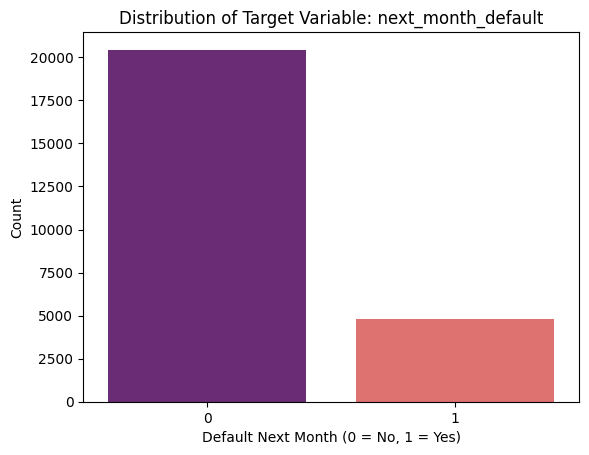

In [2040]:
#Visualize class distribution for target variable

sns.countplot(x='next_month_default', data=train_df, palette='magma')
plt.title('Distribution of Target Variable: next_month_default')
plt.xlabel('Default Next Month (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


### Highlighting class imbalance problem

In [2041]:
#There is a significant class imbalance in the dataset:
###The majority of customers (around 20,000) did not default.
###A smaller portion (around 5,000) did default.

#Consider techniques like:
###Resampling (Oversampling, SMOTE, Undersampling).
###Using algorithms that handle imbalance well

## Demographic Features

### Marriage

In [2042]:
train_df['marriage'].value_counts()

,count
marriage,
2,13441
1,11480
3,273
0,53


In [2043]:
# Merging 0 and 3 since it is negligible part of dataset and anyways we have 3 labeled as others ,
#so keeping the unknown as others

train_df['marriage'] = train_df['marriage'].replace(0, 3)
train_df['marriage'].value_counts()


,count
marriage,
2,13441
1,11480
3,326


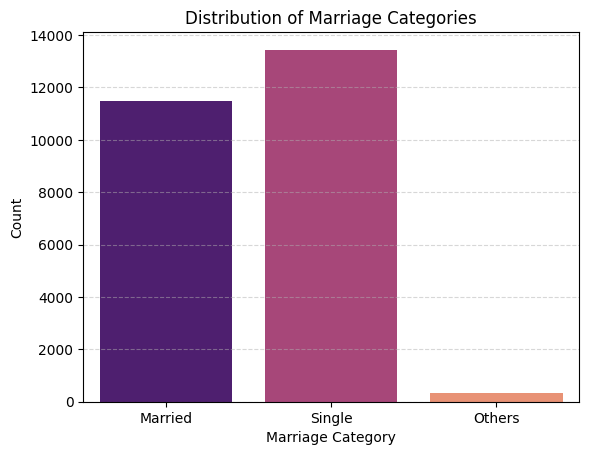

In [2044]:
sns.countplot(data=train_df, x='marriage', palette='magma')
plt.title('Distribution of Marriage Categories')
plt.xlabel('Marriage Category')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Married', 'Single', 'Others'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

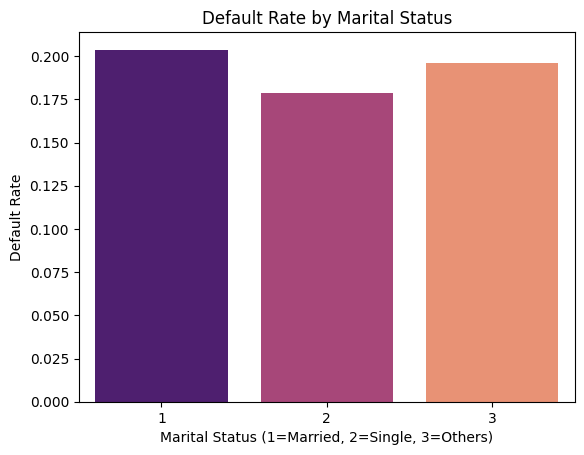

In [2045]:
marriage_default = train_df.groupby('marriage')['next_month_default'].mean()

sns.barplot(x=marriage_default.index, y=marriage_default.values, palette='magma')
plt.title("Default Rate by Marital Status")
plt.xlabel("Marital Status (1=Married, 2=Single, 3=Others)")
plt.ylabel("Default Rate")
plt.show()

In [2046]:
#Married individuals(1) have the highest default rate, slightly above 20%.
#Single individuals(2) show the lowest default rate, around 18%.
#Others(3) fall in between, close to 19.5%.



### Sex

In [2047]:
train_df['sex'].value_counts()

,count
sex,
1,15252
0,9995


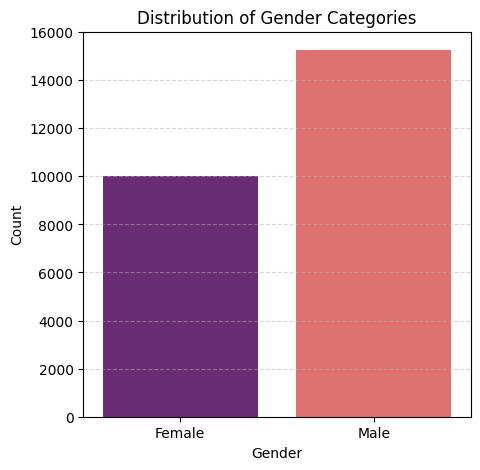

In [2048]:
plt.figure(figsize=(5, 5))
sns.countplot(x='sex', data=train_df, palette='magma')
plt.title('Distribution of Gender Categories')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0,1],['Female', 'Male'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

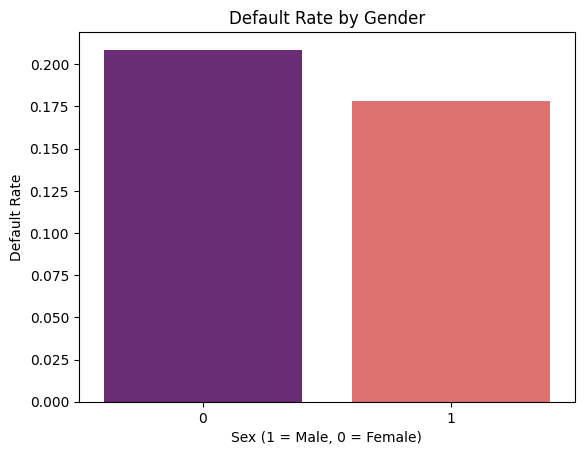

In [2049]:
sex_default = train_df.groupby('sex')['next_month_default'].mean()

sns.barplot(x=sex_default.index, y=sex_default.values, palette='magma')
plt.title("Default Rate by Gender")
plt.xlabel("Sex (1 = Male, 0 = Female)")
plt.ylabel("Default Rate")
plt.show()

In [2050]:
#males defaulting more. Could reflect income patterns or risk behavior.

### Education

In [2051]:
train_df['education'].value_counts()

,count
education,
2,11717
1,8988
3,4115
5,253
4,116
6,44
0,14


In [2052]:
# Club invalid or unknown education categories (0, 4, 5, 6) into one label: 4 (Others)
train_df['education'] = train_df['education'].replace([0, 4, 5, 6], 4)
train_df['education'].value_counts()

,count
education,
2,11717
1,8988
3,4115
4,427


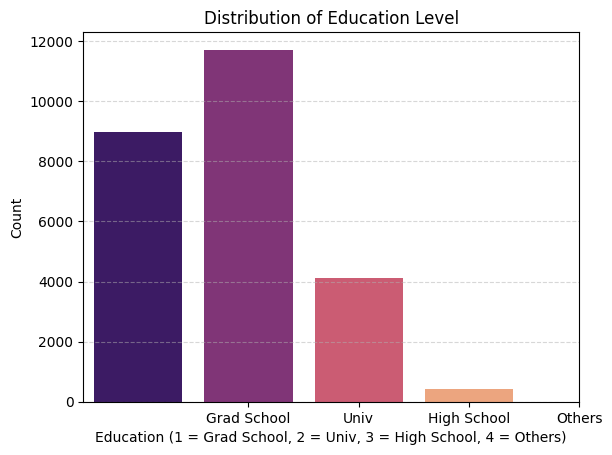

In [2053]:

sns.countplot(x='education', data=train_df, palette='magma')
plt.title('Distribution of Education Level')
plt.xlabel('Education (1 = Grad School, 2 = Univ, 3 = High School, 4 = Others)')
plt.ylabel('Count')
plt.xticks([1,2,3,4],['Grad School', 'Univ', 'High School', 'Others'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

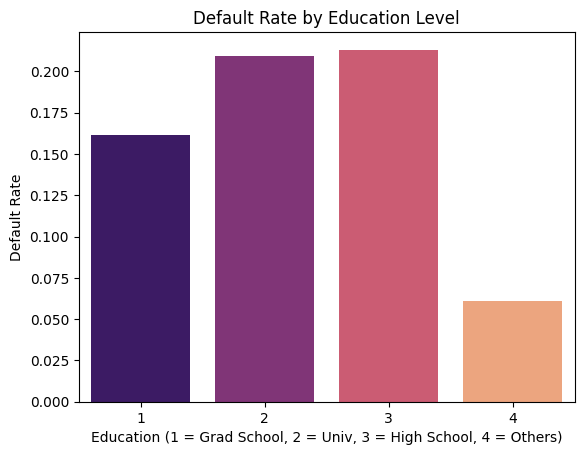

In [2054]:
edu_default = train_df.groupby('education')['next_month_default'].mean()

sns.barplot(x=edu_default.index, y=edu_default.values,palette='magma')
plt.title("Default Rate by Education Level")
plt.xlabel("Education (1 = Grad School, 2 = Univ, 3 = High School, 4 = Others)")
plt.ylabel("Default Rate")
plt.show()

In [2055]:
#Individuals holding a graduate-level education typically benefit from more stable employment, higher income levels, and stronger financial knowledge — all of which contribute to more responsible credit behavior and a lower likelihood of default.
#In contrast, customers with only a university or high school education tend to show higher default rates. This segment is often more financially heterogeneous; for instance, university graduates may still be in the early stages of their careers, dealing with student debt, irregular earnings, or limited financial buffers, which can elevate their credit risk.

### Age

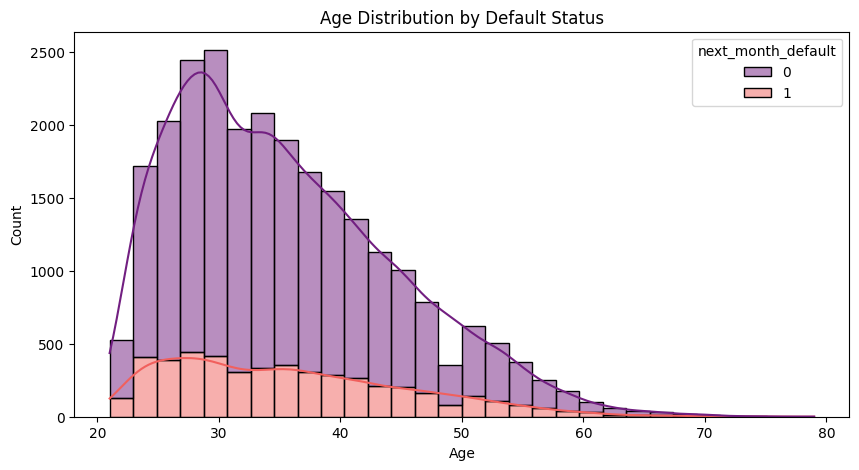

In [2056]:
plt.figure(figsize=(10, 5))
sns.histplot(data=train_df, x=('age'), bins=30, kde=True, hue='next_month_default', multiple='stack', palette='magma')
plt.title("Age Distribution by Default Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)  #ignoring future warnings

In [2057]:
#Young customers have higher risk due to low savings
#while very old ones have lower risk due to lower spending
#for better understanding grouping ages into bins

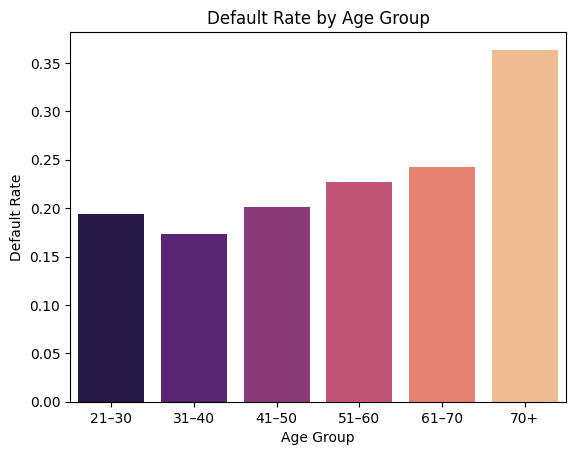

In [2058]:
train_df['age_group'] = pd.cut(train_df['age'], bins=[20, 30, 40, 50, 60, 70, 100],
                               labels=["21–30", "31–40", "41–50", "51–60", "61–70", "70+"])

# Default rate by age group
age_grp_default = train_df.groupby('age_group')['next_month_default'].mean()

sns.barplot(x=age_grp_default.index, y=age_grp_default.values, palette='magma')
plt.title("Default Rate by Age Group")
plt.ylabel("Default Rate")
plt.xlabel("Age Group")
plt.show()


In [2059]:
demo_features = ['age', 'sex', 'education', 'marriage', 'next_month_default']
#Compute correlation matrix
correlation_matrix = train_df[demo_features].corr()
#Display correlation of each demographic feature with the target
correlation_with_target = correlation_matrix['next_month_default'].drop('next_month_default')
correlation_with_target

,next_month_default
age,0.017703
sex,-0.037537
education,0.032346
marriage,-0.029242


In [2060]:
#weak correlations can still be important for tree-based models or interact with behavioral features.

### LIMIT_BAL

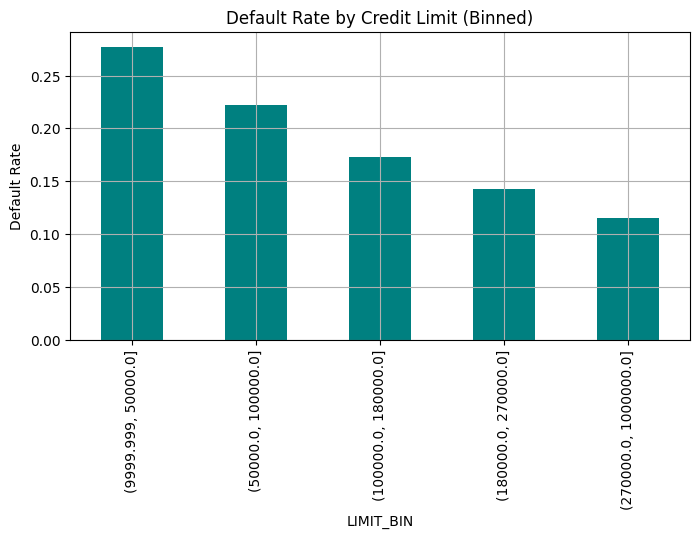

In [2061]:
# Bin LIMIT_BAL into categories
train_df['LIMIT_BIN'] = pd.qcut(train_df['LIMIT_BAL'], q=5, duplicates='drop')

# Default rate per bin
limit_default = train_df.groupby('LIMIT_BIN')['next_month_default'].mean()

# Plot
limit_default.plot(kind='bar', color='teal', figsize=(8, 4))
plt.ylabel("Default Rate")
plt.title("Default Rate by Credit Limit (Binned)")
plt.grid(True)
plt.show()


In [2062]:
correlation = train_df[['LIMIT_BAL', 'next_month_default']].corr().iloc[0, 1]
print(f"Correlation between LIMIT_BAL and default: {correlation:.4f}")


Correlation between LIMIT_BAL and default: -0.1460


In [2063]:
#As the credit limit increases, the likelihood of default slightly decreases.
#LIMIT_BAL is not a strong predictor

## Behavioral Features

### PAY columns (e.g., PAY_0 to PAY_6)

In [2064]:
train_df['pay_0'].value_counts()

,count
pay_0,
0,12667
-1,4821
1,3030
-2,2331
2,2047
3,244
4,56
5,21
8,14


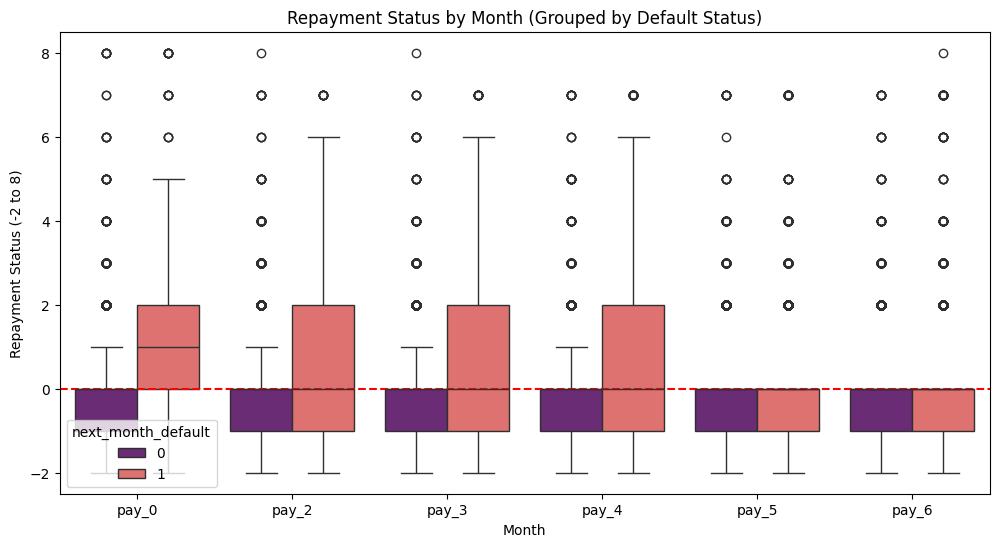

In [2065]:
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

# Melt for visualization
pay_melt = train_df.melt(id_vars='next_month_default', value_vars=pay_cols,
                         var_name='Month', value_name='Repayment_Status')

plt.figure(figsize=(12, 6))
sns.boxplot(data=pay_melt, x='Month', y='Repayment_Status', hue='next_month_default', palette='magma')
plt.title('Repayment Status by Month (Grouped by Default Status)')
plt.ylabel('Repayment Status (-2 to 8)')
plt.xlabel('Month')
plt.axhline(0, color='red', linestyle='--')
plt.show()

In [2066]:
#The pink bars (default = 1) consistently show higher and more positive repayment statuses across months.
 ##Positive values (1–8) indicate delayed payments or delinquency.

#The purple bars (default = 0) cluster around 0 or negative values:

 ##Zero = paid on time.
 ##Negative = paid in advance.

#This difference is stark — showing that past repayment behavior is predictive of future default.

In [2067]:
#Higher repayment status (like 1, 2, 3…) means more months overdue.
#Defaults have higher pay_m values — repeated delinquencies.

#This validates the use of:
 ##MAX_DELAY – the max of pay_x.
 ##DELINQUENCY_STREAK – max consecutive months of positive status.
 ##REPAYMENT_CONSISTENCY – derived from variability in pay_x.

### Bill_amt and pay_amt Trends

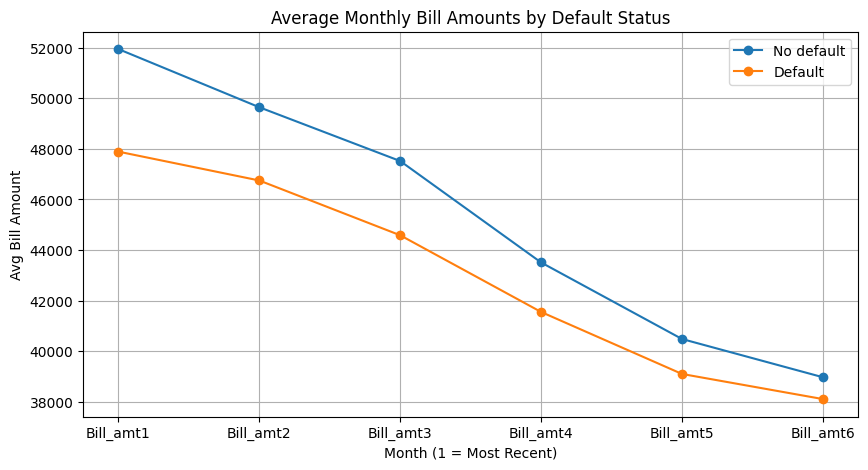

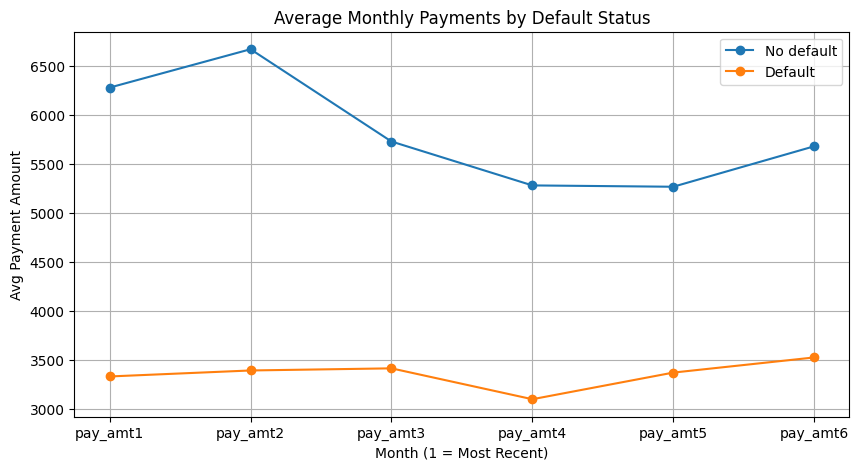

In [2068]:
bill_cols = [f'Bill_amt{i}' for i in range(1, 7)]
pay_amt_cols = [f'pay_amt{i}' for i in range(1, 7)]

#bill trend by default status
avg_bill_by_default = train_df.groupby('next_month_default')[bill_cols].mean().T
avg_bill_by_default.columns = ['No default', 'Default']

avg_bill_by_default.plot(figsize=(10, 5), marker='o')
plt.title("Average Monthly Bill Amounts by Default Status")
plt.xlabel("Month (1 = Most Recent)")
plt.ylabel("Avg Bill Amount")
plt.grid(True)
plt.show()

#payment trend
avg_pay_by_default = train_df.groupby('next_month_default')[pay_amt_cols].mean().T
avg_pay_by_default.columns = ['No default', 'Default']

avg_pay_by_default.plot(figsize=(10, 5), marker='o')
plt.title("Average Monthly Payments by Default Status")
plt.xlabel("Month (1 = Most Recent)")
plt.ylabel("Avg Payment Amount")
plt.grid(True)
plt.show()


In [2069]:
#The first chart shows the average monthly bill amounts for customers grouped by default status.
#We observe that customers who did not default had consistently higher bill amounts across all six months compared to those who defaulted.
#This suggests that defaulters may have had lower credit utilization or limited access to credit,
#or they started reducing spending over time as financial stress built up.

#In contrast, the second chart on average monthly payments highlights a more striking pattern:
#non-defaulters consistently made higher payments, with a noticeable peak around the second month.
#Meanwhile, defaulters made significantly lower payments, with very little variation over the months.
#This gap in payment behavior is a strong indicator of credit risk,
#showing that payment history can serve as a powerful predictor for default in classification models.

### PAY_TO_BILL_ratio

In [2070]:
#

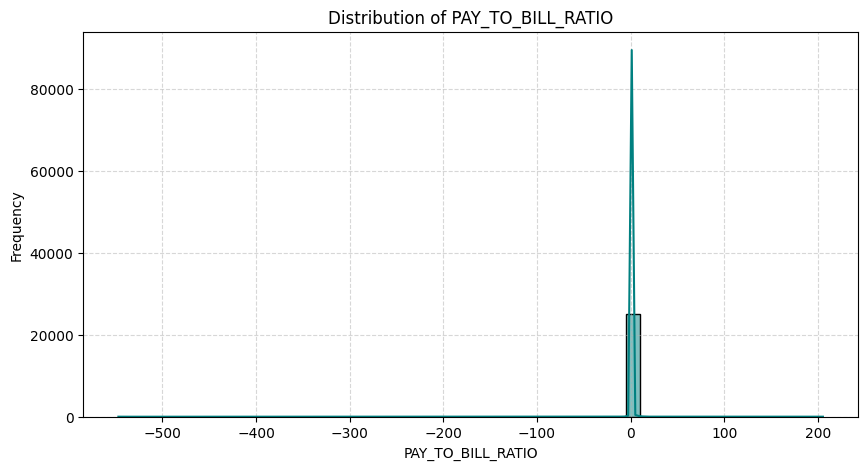

In [2071]:
plt.figure(figsize=(10, 5))
sns.histplot(train_df['PAY_TO_BILL_ratio'], bins=50, kde=True, color='teal')
plt.title("Distribution of PAY_TO_BILL_RATIO")
plt.xlabel("PAY_TO_BILL_RATIO")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


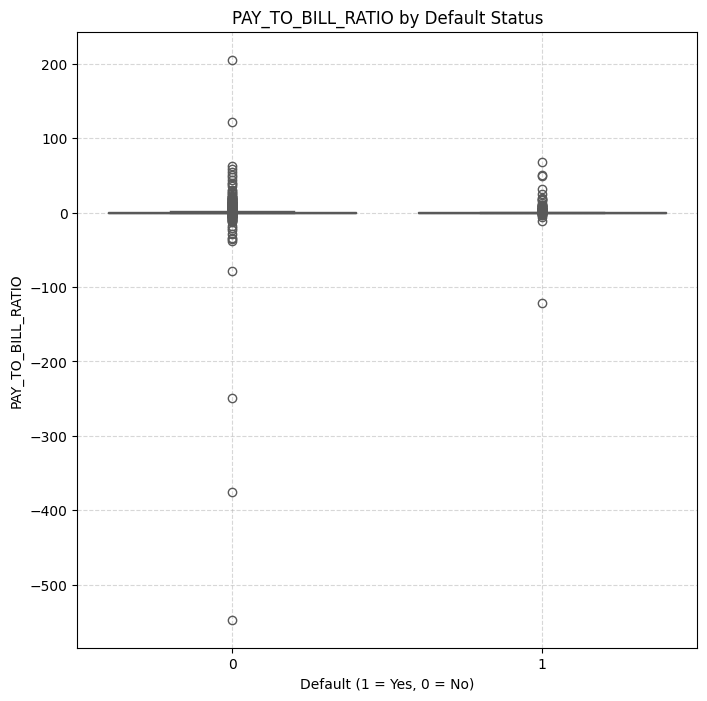

In [2072]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=train_df, x='next_month_default', y='PAY_TO_BILL_ratio', palette='Set2')
plt.title("PAY_TO_BILL_RATIO by Default Status")
plt.xlabel("Default (1 = Yes, 0 = No)")
plt.ylabel("PAY_TO_BILL_RATIO")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


        PAY_TO_BILL_RATIO Bin  Count  Default Rate
0  (-546.9309999999999, 0.04]   7729      0.246862
1                (0.04, 0.06]   3280      0.226524
2                (0.06, 0.19]   4288      0.200326
3                (0.19, 0.77]   4943      0.128869
4              (0.77, 205.38]   5007      0.131815


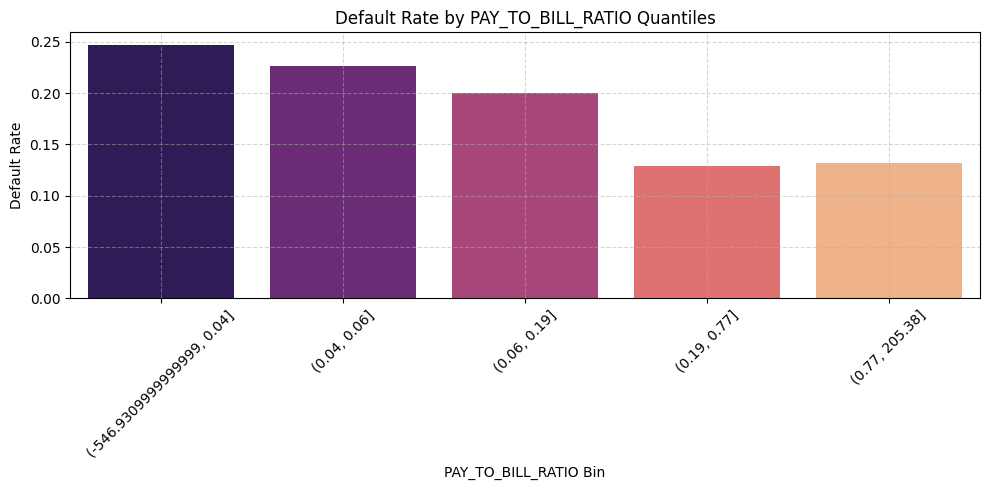

In [2073]:
train_df['PAY_TO_BILL_bin'] = pd.qcut(train_df['PAY_TO_BILL_ratio'], q=5, duplicates='drop')

# Group by bin
bin_stats = train_df.groupby('PAY_TO_BILL_bin')['next_month_default'].agg(['count', 'mean']).reset_index()
bin_stats.columns = ['PAY_TO_BILL_RATIO Bin', 'Count', 'Default Rate']

print(bin_stats)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=bin_stats, x='PAY_TO_BILL_RATIO Bin', y='Default Rate', palette='magma')
plt.title('Default Rate by PAY_TO_BILL_RATIO Quantiles')
plt.ylabel('Default Rate')
plt.xlabel('PAY_TO_BILL_RATIO Bin')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [2074]:
#The chart shows a declining trend in default rates as the PAY_TO_BILL_RATIO increases.
#Customers in the lowest quantile (ratio near or below 0.04) have the highest default rate (~25%),
#while those in the top quantile (ratio > 0.77) show a significantly lower default rate (~13%).
#This indicates that customers who pay a larger proportion of their bill tend to be less risky borrowers.

#Interestingly, even modest increases in the ratio—from 0.04 to 0.19—are associated with meaningful drops in default probability,
#highlighting the predictive power of this financial behavior metric.
#This relationship reinforces that the PAY_TO_BILL_RATIO is a valuable feature for classification models in credit default prediction.

In [2075]:
correlation = train_df[['PAY_TO_BILL_ratio', 'next_month_default']].corr()
print(correlation)


                    PAY_TO_BILL_ratio  next_month_default
PAY_TO_BILL_ratio            1.000000           -0.005528
next_month_default          -0.005528            1.000000


# Feature Engineering

## Derived Features

### DELINQUENCY_STREAK

In [2076]:
train_df['DELINQUENCY_STREAK'] = train_df[pay_cols].apply(lambda row: sum(row >= 1), axis=1) #Longest continuous streak of overdue months

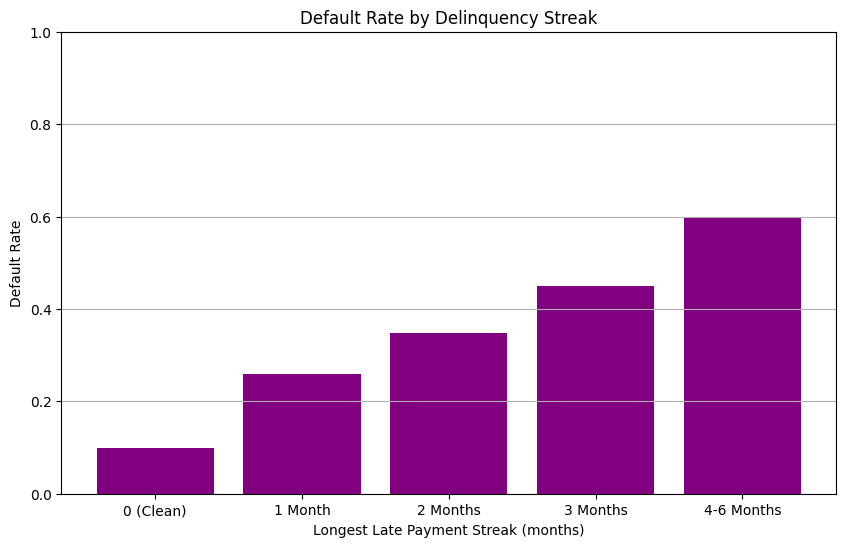

In [2077]:
# bin DELINQUENCY_STREAK
bins = [-1, 0, 1, 2, 3, 6, 10]
labels = ['0 (Clean)', '1 Month', '2 Months', '3 Months', '4-6 Months', '7+ Months']
train_df['streak_bin'] = pd.cut(train_df['DELINQUENCY_STREAK'], bins=bins, labels=labels)

#default rate per bin
streak_default_rate = train_df.groupby('streak_bin')['next_month_default'].mean().reset_index()

#plot
plt.figure(figsize=(10, 6))
plt.bar(streak_default_rate['streak_bin'], streak_default_rate['next_month_default'], color='purple')
plt.title('Default Rate by Delinquency Streak')
plt.xlabel('Longest Late Payment Streak (months)')
plt.ylabel('Default Rate')
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.show()

In [2078]:
##This plot illustrates the relationship between the length of a customer's delinquency streak
#(i.e., the number of consecutive months they have missed payments) and their likelihood of defaulting.
#As observed, the default rate increases steadily with longer delinquency streaks — from ~10% for customers
#with no missed payments to ~60% for those with 4–6 months of missed payments. This strong, positive trend
#highlights that delinquency streak is a highly predictive feature for credit default risk and should be
#treated as a key variable during modeling and risk assessment.


### CREDIT_UTILIZATION_RATIO

In [2079]:
#let’s define and plot Credit Utilization:
#Credit Utilization = AVG_Bill_amt / LIMIT_BAL

In [2080]:
#average bill amount already exists as AVG_Bill_amt
train_df['CREDIT_UTILIZATION_RATIO'] = train_df['AVG_Bill_amt'] / train_df['LIMIT_BAL']

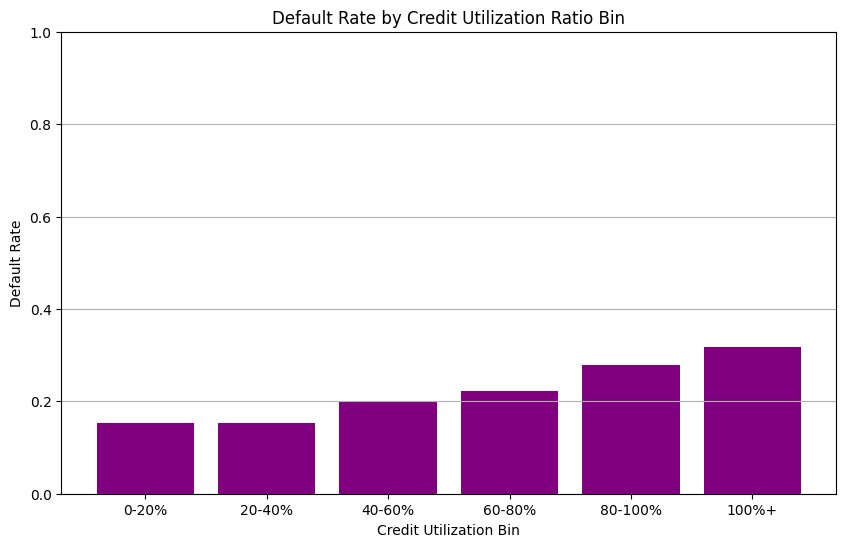

In [2081]:
#bin credit utilization into discrete ranges
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0, 2.0]
labels = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%', '100%+']
train_df['util_bin'] = pd.cut(train_df['CREDIT_UTILIZATION_RATIO'], bins=bins, labels=labels, include_lowest=True)

#calculate default rate in each bin
util_default_rate = train_df.groupby('util_bin')['next_month_default'].mean().reset_index()

#plot
plt.figure(figsize=(10, 6))
plt.bar(util_default_rate['util_bin'], util_default_rate['next_month_default'], color='purple')
plt.title('Default Rate by Credit Utilization Ratio Bin')
plt.xlabel('Credit Utilization Bin')
plt.ylabel('Default Rate')
plt.grid(True, axis='y')
plt.ylim(0, 1)
plt.show()


In [2082]:
##This plot demonstrates how the credit utilization ratio correlates with default rates.
#customers with lower utilization (0–40%) have relatively low and stable default rates (~15%),
#while the default risk steadily increases as utilization rises — peaking at ~30% for customers
#who utilize more than 100% of their credit limit. This trend indicates that customers who max
#out or exceed their credit limits are significantly more likely to default, making the
#CREDIT_UTILIZATION_RATIO a critical predictive feature in assessing credit risk.


### MAX_DELAY, NUM_OVERDUE_MONTHS, AVG_DELAY

In [2083]:
train_df['MAX_DELAY'] = train_df[pay_cols].apply(lambda row: max(row), axis=1) #Max delay in any month (from PAY_0 to PAY_6) (maximum repayment delay)
train_df['NUM_OVERDUE_MONTHS'] = train_df[pay_cols].apply(lambda row: sum(row > 0), axis=1) #Count of months with PAY ≥1
train_df['AVG_DELAY'] = train_df[pay_cols].apply(lambda row: row[row > 0].mean() if any(row > 0) else 0, axis=1) #Mean delay across 6 months

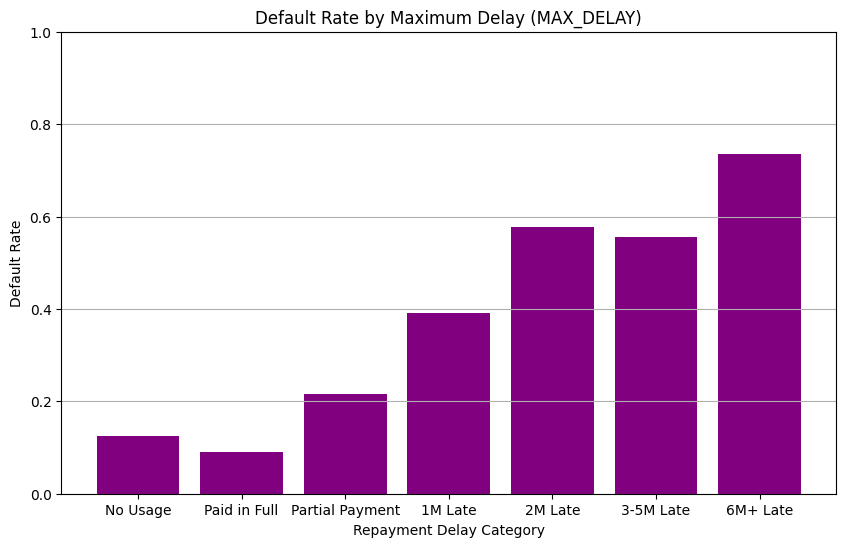

In [2084]:
#MAX_DELAY

#bin MAX_DELAY into readable categories
bins = [-3, -1, 0, 1, 2, 3, 6, 10]
labels = ['No Usage', 'Paid in Full', 'Partial Payment', '1M Late', '2M Late', '3-5M Late', '6M+ Late']
train_df['max_delay_bin'] = pd.cut(train_df['MAX_DELAY'], bins=bins, labels=labels)

#compute default rate by bin
delay_default_rate = train_df.groupby('max_delay_bin')['next_month_default'].mean().reset_index()

#plot
plt.figure(figsize=(10, 6))
plt.bar(delay_default_rate['max_delay_bin'], delay_default_rate['next_month_default'], color='purple')
plt.title('Default Rate by Maximum Delay (MAX_DELAY)')
plt.xlabel('Repayment Delay Category')
plt.ylabel('Default Rate')
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.show()


In [2085]:
#this bar plot illustrates the strong relationship between the maximum repayment delay (MAX_DELAY) and default rate.
#borrowers who either had no usage or paid in full show the lowest default rates (~10–13%), indicating responsible credit behavior.
#however, as repayment delays increase — from partial payments to 1M, 2M, and beyond — the default rate escalates sharply.
#the risk of default rises drastically, reaching over 75% for those who are 6+ months late.
#this underscores MAX_DELAY as a highly predictive risk feature, with longer delays reflecting higher credit risk.


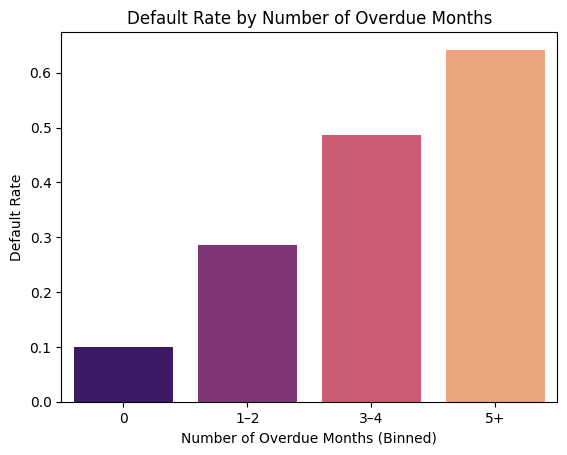

In [2086]:
#NUM_OVERDUE_MONTHS

#define the bins and labels
bins = [ -1, 0, 2, 4, float('inf') ]
labels = ['0', '1–2', '3–4', '5+']
train_df['overdue_bin'] = pd.cut(train_df['NUM_OVERDUE_MONTHS'], bins=bins, labels=labels)

#calculate Default Rate per Bin:
default_rate = train_df.groupby('overdue_bin')['next_month_default'].mean().reset_index()

#plot Bar Chart:
sns.barplot(data=default_rate, x='overdue_bin', y='next_month_default', palette='magma')
plt.xlabel('Number of Overdue Months (Binned)')
plt.ylabel('Default Rate')
plt.title('Default Rate by Number of Overdue Months')
plt.show()


In [2087]:
#This bar plot shows a clear upward trend in default rates as the number of overdue months increases.
#Borrowers with no overdue months ("0") have a low default rate (~10%),
#while those with 1–2 overdue months show a significantly higher risk (~29%).
#The default rate continues to rise for the 3–4 months group (~49%) and peaks for customers with 5 or more overdue months (~65%).
#This strong positive correlation indicates that the number of overdue months is a critical feature in predicting the likelihood of default,
#making it a valuable variable for credit risk modeling.

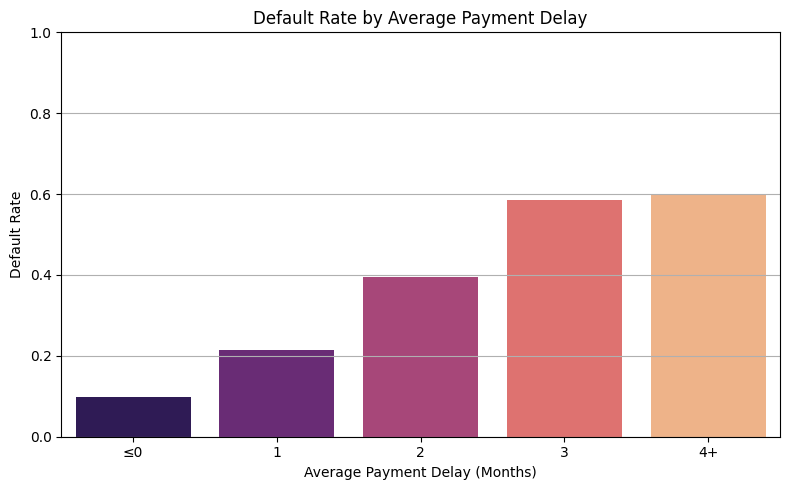

In [2088]:
#AVG_DELAY

#bin the AVG_DELAY column
bins = [-1, 0, 1, 2, 3, train_df['AVG_DELAY'].max()]
labels = ['≤0', '1', '2', '3', '4+']
train_df['AVG_DELAY_BIN'] = pd.cut(train_df['AVG_DELAY'], bins=bins, labels=labels)

#calculate default rate for each bin
avg_delay_default = train_df.groupby('AVG_DELAY_BIN')['next_month_default'].mean().reset_index()

#plotting
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_delay_default, x='AVG_DELAY_BIN', y='next_month_default', palette='magma')
plt.title('Default Rate by Average Payment Delay')
plt.xlabel('Average Payment Delay (Months)')
plt.ylabel('Default Rate')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [2089]:
#This bar plot visualizes the relationship between average payment delay (in months) and the default rate.
#It shows a clear increasing trend—borrowers with no payment delays (≤0 months) have a very low default rate (~10%),
#but as the average delay increases, so does the risk of default.
#For instance, a 1-month delay corresponds to a ~22% default rate,
#while delays of 2 and 3 months push the rate to around 39% and 58% respectively.
#Borrowers with average delays of 4 or more months have the highest default risk (~60%).
#This indicates that average payment delay is a strong signal for predicting default, highlighting its importance in credit risk evaluation models.

### PAYMENT_REGULARITY

In [2090]:
pay_cols

['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

In [2091]:
train_df['PAYMENT_REGULARITY'] = train_df[pay_cols].apply(lambda row: sum(row <= 0) / len(row), axis=1)


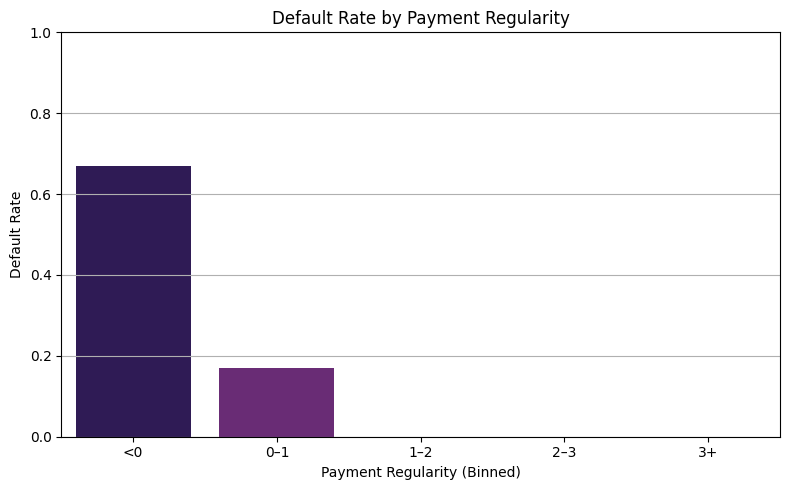

In [2092]:
# Adjusted bin edges (based on typical range)
bins = [-float('inf'), 0, 1, 2, 3, float('inf')]
labels = ['<0', '0–1', '1–2', '2–3', '3+']

train_df['PAYMENT_REGULARITY_BIN'] = pd.cut(train_df['PAYMENT_REGULARITY'], bins=bins, labels=labels)

# Calculate default rate by bin
pay_reg_default = train_df.groupby('PAYMENT_REGULARITY_BIN')['next_month_default'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(data=pay_reg_default, x='PAYMENT_REGULARITY_BIN', y='next_month_default', palette='magma')
plt.title('Default Rate by Payment Regularity')
plt.xlabel('Payment Regularity (Binned)')
plt.ylabel('Default Rate')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [2093]:
#This plot illustrates the relationship between payment regularity and default rate.
#Payment regularity here refers to how consistently a borrower pays on time or early (values ≤ 0).
#As shown, individuals with very low regularity (<0) exhibit a very high default rate (~67%), indicating a strong risk profile.
#However, even a slight improvement in regularity (in the 0–1 range) leads to a significant drop in default rate (~17%).
#Overall, this trend confirms that more regular or early payments are associated with lower chances of default,
#making payment regularity a highly predictive and valuable feature for credit risk modeling.

In [2094]:
print("Min:", train_df['PAYMENT_REGULARITY'].min())
print("Max:", train_df['PAYMENT_REGULARITY'].max())


Min: 0.0
Max: 1.0


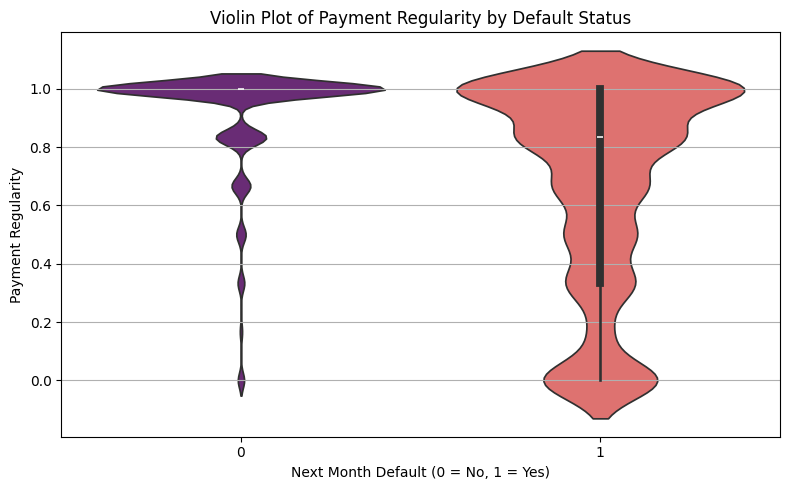

In [2095]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=train_df, x='next_month_default', y='PAYMENT_REGULARITY', palette='magma', inner='box')
plt.title('Violin Plot of Payment Regularity by Default Status')
plt.xlabel('Next Month Default (0 = No, 1 = Yes)')
plt.ylabel('Payment Regularity')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


In [2096]:
#The violin plot reveals a striking contrast in payment regularity between customers who defaulted (1) and those who did not (0).
#Non-defaulters have payment regularity densely concentrated near 1.0, suggesting consistently timely payments.
#In contrast, defaulters show a broader, more dispersed distribution, with many customers having lower regularity values — even approaching zero.
#This clear distributional separation implies that payment regularity is a highly discriminative feature.
#It can be effectively used by machine learning models to distinguish high-risk individuals,
#making it an excellent candidate for credit scoring models or default prediction.

### TOTAL_PAY_AMT, PAYMENT_TO_LIMIT_RATIO


In [2097]:
pay_amt_cols = [col for col in train_df.columns if 'pay_amt' in col]
train_df['TOTAL_PAY_AMT'] = train_df[pay_amt_cols].sum(axis=1) #Total payment over 6 months
train_df['PAYMENT_TO_LIMIT_RATIO'] = train_df['TOTAL_PAY_AMT'] / train_df['LIMIT_BAL'] #Total pay / limit


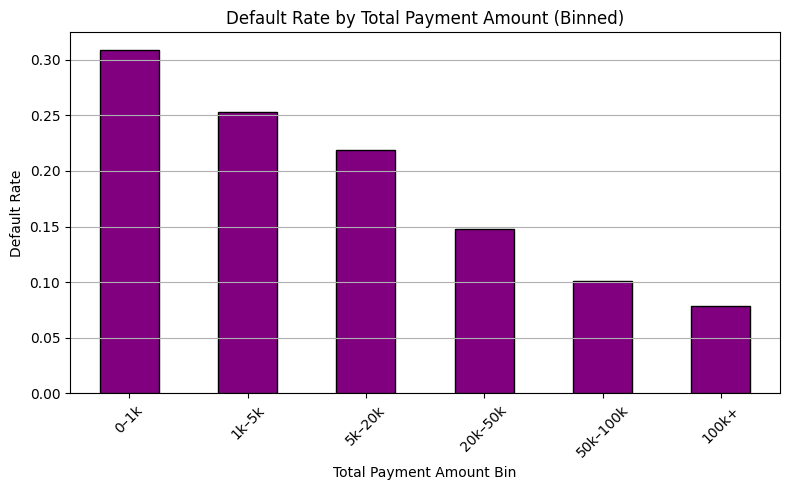

In [2098]:
# Define bins (adjust based on your data distribution)
bins = [0, 1000, 5000, 20000, 50000, 100000, train_df['TOTAL_PAY_AMT'].max()]
labels = ['0–1k', '1k–5k', '5k–20k', '20k–50k', '50k–100k', '100k+']

# Create a binned column
train_df['TOTAL_PAY_AMT_BIN'] = pd.cut(train_df['TOTAL_PAY_AMT'], bins=bins, labels=labels, include_lowest=True)

# Calculate default rate per bin
default_rate = train_df.groupby('TOTAL_PAY_AMT_BIN')['next_month_default'].mean()

# Plot
plt.figure(figsize=(8, 5))
default_rate.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Default Rate by Total Payment Amount (Binned)')
plt.ylabel('Default Rate')
plt.xlabel('Total Payment Amount Bin')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [2099]:
#This bar chart shows the relationship between total payment amount and default rate, segmented into bins.
#The trend clearly reveals that higher total payment amounts are associated with significantly lower default rates.
#Customers who paid only ₹0–1K had the highest default rate (over 30%),
#while those who paid more than ₹100K had a default rate below 8%.
#This inverse relationship indicates that individuals making larger cumulative payments are generally more financially reliable
#and pose lower credit risk.
#Therefore, total payment amount serves as a strong negative indicator of default probability in credit risk modeling.

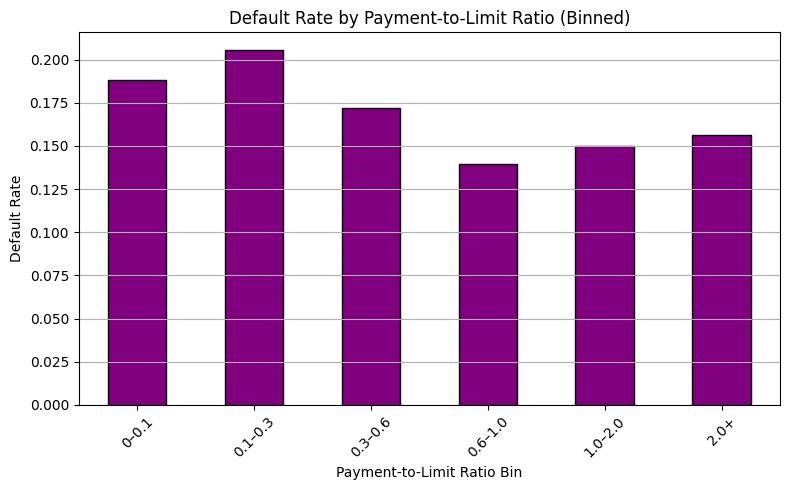

In [2100]:
# Define bins for PAYMENT_TO_LIMIT_RATIO
bins = [0, 0.1, 0.3, 0.6, 1.0, 2.0, train_df['PAYMENT_TO_LIMIT_RATIO'].max()]
labels = ['0–0.1', '0.1–0.3', '0.3–0.6', '0.6–1.0', '1.0–2.0', '2.0+']

# Create binned column
train_df['PAYMENT_TO_LIMIT_RATIO_BIN'] = pd.cut(train_df['PAYMENT_TO_LIMIT_RATIO'], bins=bins, labels=labels, include_lowest=True)

# Compute default rate by bin
default_rate = train_df.groupby('PAYMENT_TO_LIMIT_RATIO_BIN')['next_month_default'].mean()

# Plotting
plt.figure(figsize=(8, 5))
default_rate.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Default Rate by Payment-to-Limit Ratio (Binned)')
plt.ylabel('Default Rate')
plt.xlabel('Payment-to-Limit Ratio Bin')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [2101]:
#Analyzing the relationship between the Payment-to-Limit Ratio and default rate reveals a non-linear pattern.
#Borrowers with a ratio between 0.3 and 1.0 tend to have the lowest default rates, indicating balanced repayment behavior.
#Interestingly, default risk peaks for users with very low ratios (0.1–0.3),
#suggesting that minimal repayments might be a sign of financial distress or revolving debt habits.
#On the other hand, users with very high ratios (above 1.0), while fewer in number,
#also show a slightly increased default risk—possibly due to aggressive repayment patterns or unstable finances.
#This U-shaped trend indicates that moderate repayment relative to the credit limit is a healthy sign,
#and this feature should be treated non-linearly in modeling.

### REPAYMENT_CONSISTENCY

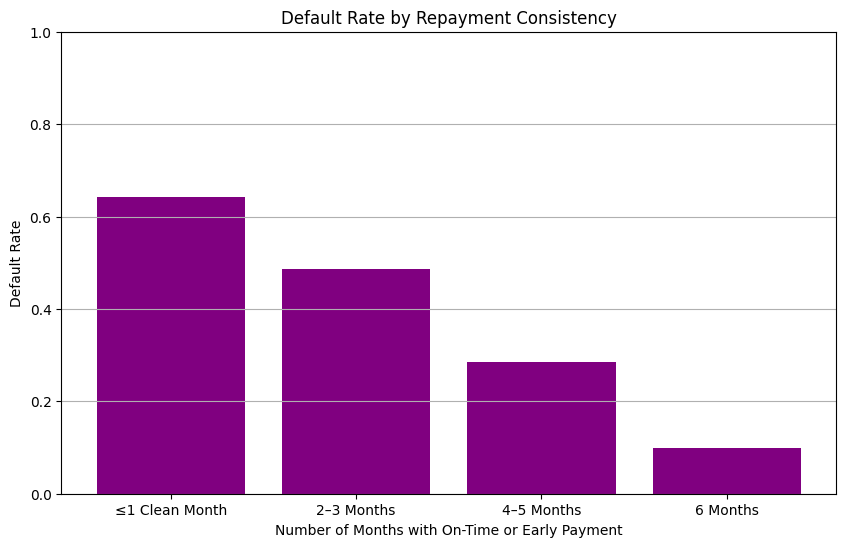

In [2102]:
# Count months with no overdue payments (pay_m ≤ 0)
train_df['REPAYMENT_CONSISTENCY'] = (train_df[pay_cols] <= 0).sum(axis=1)

# Bin the consistency counts
bins = [-1, 1, 3, 5, 6, 7]
labels = ['≤1 Clean Month', '2–3 Months', '4–5 Months', '6 Months', 'Perfect (7)']
train_df['consistency_bin'] = pd.cut(train_df['REPAYMENT_CONSISTENCY'], bins=bins, labels=labels)

# Compute default rate per bin
consistency_default_rate = train_df.groupby('consistency_bin')['next_month_default'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(consistency_default_rate['consistency_bin'], consistency_default_rate['next_month_default'], color='purple')
plt.title('Default Rate by Repayment Consistency')
plt.xlabel('Number of Months with On-Time or Early Payment')
plt.ylabel('Default Rate')
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.show()


In [2103]:
#This plot clearly shows a strong inverse relationship between repayment consistency and default rate.
#Borrowers who consistently made on-time or early payments across all 6 months had the lowest default rate—under 10%.
#In contrast, those with one or fewer clean repayment months faced a significantly higher default rate, exceeding 65%.
#This highlights repayment consistency as a powerful predictor of credit risk.
#The trend also suggests that even moderate improvements in repayment behavior (e.g., moving from 2–3 to 4–5 months)
#can substantially reduce the likelihood of default.
#This feature should be given high importance in model development and could be used as a risk segmentation variable.

In [2104]:
train_df.head()

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,overdue_bin,AVG_DELAY_BIN,PAYMENT_REGULARITY,PAYMENT_REGULARITY_BIN,TOTAL_PAY_AMT,PAYMENT_TO_LIMIT_RATIO,TOTAL_PAY_AMT_BIN,PAYMENT_TO_LIMIT_RATIO_BIN,REPAYMENT_CONSISTENCY,consistency_bin
0,2,0,2,60000,25.0,2,2,2,0,0,...,3–4,2,0.5,0–1,7957.11,0.132619,5k–20k,0.1–0.3,3,2–3 Months
1,2,1,1,290000,24.0,0,0,-2,-2,-1,...,0,≤0,1.0,0–1,4049.99,0.013965,1k–5k,0–0.1,6,6 Months
2,1,0,2,180000,63.0,0,0,0,0,0,...,0,≤0,1.0,0–1,12055.72,0.066976,5k–20k,0–0.1,6,6 Months
3,1,1,2,210000,43.0,0,0,0,0,0,...,0,≤0,1.0,0–1,18449.50,0.087855,5k–20k,0–0.1,6,6 Months
4,2,0,1,280000,32.0,-2,-2,-2,-2,-2,...,0,≤0,1.0,0–1,51314.20,0.183265,50k–100k,0.1–0.3,6,6 Months


## Feature Interactions

In [2105]:
# Feature Interactions
train_df['age_CREDIT_UTIL'] = train_df['age'] * train_df['CREDIT_UTILIZATION_RATIO']
train_df['sex_MAX_DELAY'] = train_df['sex'] * train_df['MAX_DELAY']
train_df['education_AVG_DELAY'] = train_df['education'] * train_df['AVG_DELAY']
train_df['marriage_PAY_REG'] = train_df['marriage'] * train_df['PAYMENT_REGULARITY']


In [2106]:
#In this section, we engineered interaction features to capture potential nonlinear relationships and compound effects between variables:
# 'age_CREDIT_UTIL' helps identify whether older individuals with high credit utilization behave differently from younger ones.
# 'sex_MAX_DELAY' may reveal gender-based differences in delay behavior, potentially influenced by sociocultural or economic factors.
# 'education_AVG_DELAY' explores how education level interacts with average payment delays, potentially indicating awareness or discipline in financial behavior.
# 'marriage_PAY_REG' investigates whether marital status correlates with repayment regularity, possibly due to financial stability in married individuals.
#These interaction features could enhance model performance by providing richer behavioral patterns that individual variables alone may not capture.


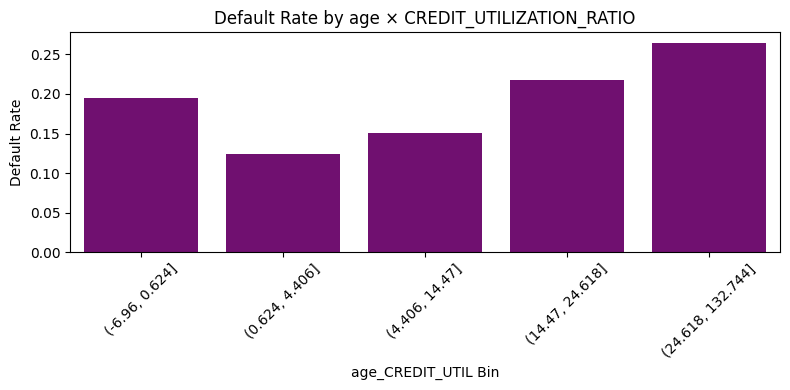

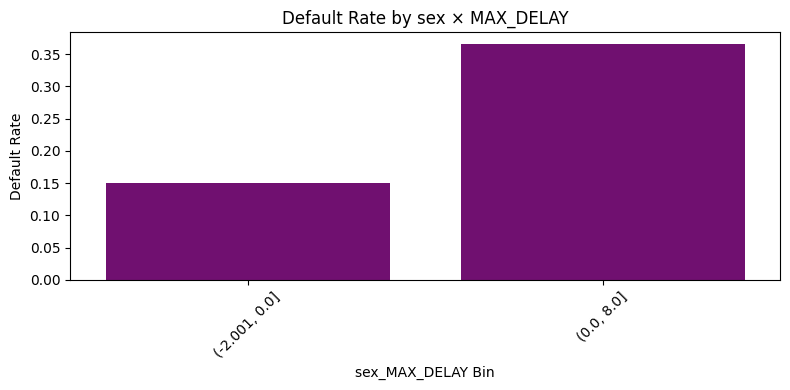

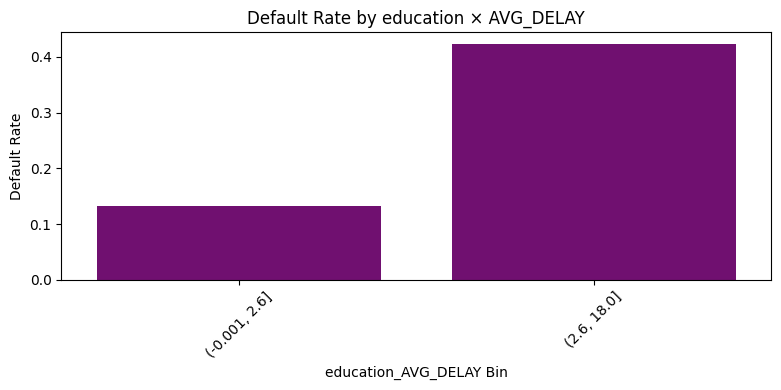

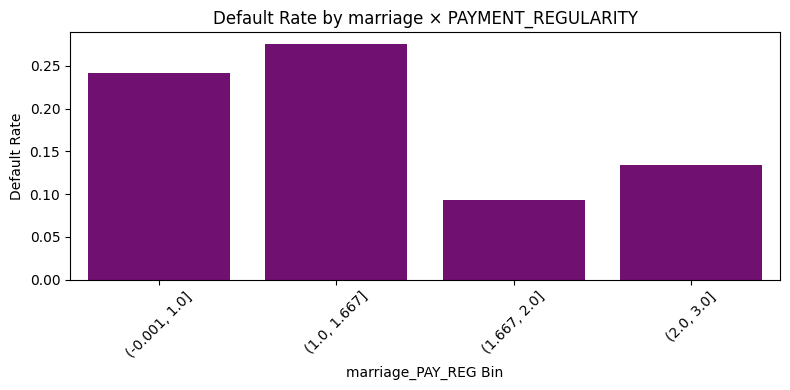

In [2107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a helper function
def plot_default_rate_binned(df, feature, bins=5, title=None):
    df_copy = df.copy()
    df_copy[feature + '_bin'] = pd.qcut(df_copy[feature], q=bins, duplicates='drop')
    default_rate = df_copy.groupby(feature + '_bin')['next_month_default'].mean()

    plt.figure(figsize=(8, 4))
    sns.barplot(x=default_rate.index.astype(str), y=default_rate.values, color='purple')
    plt.xticks(rotation=45)
    plt.xlabel(f'{feature} Bin')
    plt.ylabel('Default Rate')
    plt.title(title or f'Default Rate by {feature}')
    plt.tight_layout()
    plt.show()

# Apply to each interaction feature
plot_default_rate_binned(train_df, 'age_CREDIT_UTIL', title='Default Rate by age × CREDIT_UTILIZATION_RATIO')
plot_default_rate_binned(train_df, 'sex_MAX_DELAY', title='Default Rate by sex × MAX_DELAY')
plot_default_rate_binned(train_df, 'education_AVG_DELAY', title='Default Rate by education × AVG_DELAY')
plot_default_rate_binned(train_df, 'marriage_PAY_REG', title='Default Rate by marriage × PAYMENT_REGULARITY')


In [2108]:
features = [
    'marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio',
    'DELINQUENCY_STREAK', 'CREDIT_UTILIZATION_RATIO', 'MAX_DELAY',
    'NUM_OVERDUE_MONTHS', 'AVG_DELAY', 'PAYMENT_REGULARITY', 'TOTAL_PAY_AMT',
    'PAYMENT_TO_LIMIT_RATIO', 'REPAYMENT_CONSISTENCY',
    'age_CREDIT_UTIL', 'sex_MAX_DELAY', 'education_AVG_DELAY', 'marriage_PAY_REG'
]
features_df = train_df[features]
features_df

,marriage,sex,education,LIMIT_BAL,age,AVG_Bill_amt,PAY_TO_BILL_ratio,DELINQUENCY_STREAK,CREDIT_UTILIZATION_RATIO,MAX_DELAY,NUM_OVERDUE_MONTHS,AVG_DELAY,PAYMENT_REGULARITY,TOTAL_PAY_AMT,PAYMENT_TO_LIMIT_RATIO,REPAYMENT_CONSISTENCY,age_CREDIT_UTIL,sex_MAX_DELAY,education_AVG_DELAY,marriage_PAY_REG
0,2,0,2,60000,25.0,41511.50,0.03,3,0.691858,2,3,2.0,0.500000,7957.11,0.132619,3,17.296458,0,4.0,1.000000
1,2,1,1,290000,24.0,2534.50,0.27,0,0.008740,0,0,0.0,1.000000,4049.99,0.013965,6,0.209752,0,0.0,2.000000
2,1,0,2,180000,63.0,50422.00,0.04,0,0.280122,0,0,0.0,1.000000,12055.72,0.066976,6,17.647700,0,0.0,1.000000
3,1,1,2,210000,43.0,86229.50,0.04,0,0.410617,0,0,0.0,1.000000,18449.50,0.087855,6,17.656517,0,0.0,1.000000
4,2,0,1,280000,32.0,11814.33,0.72,0,0.042194,-2,0,0.0,1.000000,51314.20,0.183265,6,1.350209,0,0.0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25242,1,1,2,90000,33.0,82312.50,0.05,2,0.914583,2,2,2.0,0.666667,26976.13,0.299735,4,30.181250,2,4.0,0.666667
25243,1,0,2,60000,49.0,41371.67,0.14,0,0.689528,0,0,0.0,1.000000,35810.06,0.596834,6,33.786864,0,0.0,1.000000
25244,2,0,1,120000,31.0,3071.83,1.31,0,0.025599,-1,0,0.0,1.000000,24214.81,0.201790,6,0.793556,0,0.0,2.000000
25245,1,1,4,390000,40.0,197278.83,0.03,0,0.505843,0,0,0.0,1.000000,37043.16,0.094982,6,20.233726,0,0.0,1.000000


# Outlier Detection and Removal

In [2109]:
train_df.columns

Index(['marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default', 'age_group',
       'LIMIT_BIN', 'PAY_TO_BILL_bin', 'DELINQUENCY_STREAK', 'streak_bin',
       'CREDIT_UTILIZATION_RATIO', 'util_bin', 'MAX_DELAY',
       'NUM_OVERDUE_MONTHS', 'AVG_DELAY', 'max_delay_bin', 'overdue_bin',
       'AVG_DELAY_BIN', 'PAYMENT_REGULARITY', 'PAYMENT_REGULARITY_BIN',
       'TOTAL_PAY_AMT', 'PAYMENT_TO_LIMIT_RATIO', 'TOTAL_PAY_AMT_BIN',
       'PAYMENT_TO_LIMIT_RATIO_BIN', 'REPAYMENT_CONSISTENCY',
       'consistency_bin', 'age_CREDIT_UTIL', 'sex_MAX_DELAY',
       'education_AVG_DELAY', 'marriage_PAY_REG'],
      dtype='object')

In [2110]:
train_df.drop(columns = ['util_bin','max_delay_bin','streak_bin','consistency_bin',
                        'overdue_bin','AVG_DELAY_BIN', 'PAYMENT_REGULARITY_BIN', 'TOTAL_PAY_AMT_BIN',
       'PAYMENT_TO_LIMIT_RATIO_BIN','age_group', 'PAY_TO_BILL_bin','LIMIT_BIN'],inplace=True)
train_df.head()

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,NUM_OVERDUE_MONTHS,AVG_DELAY,PAYMENT_REGULARITY,TOTAL_PAY_AMT,PAYMENT_TO_LIMIT_RATIO,REPAYMENT_CONSISTENCY,age_CREDIT_UTIL,sex_MAX_DELAY,education_AVG_DELAY,marriage_PAY_REG
0,2,0,2,60000,25.0,2,2,2,0,0,...,3,2.0,0.5,7957.11,0.132619,3,17.296458,0,4.0,1.0
1,2,1,1,290000,24.0,0,0,-2,-2,-1,...,0,0.0,1.0,4049.99,0.013965,6,0.209752,0,0.0,2.0
2,1,0,2,180000,63.0,0,0,0,0,0,...,0,0.0,1.0,12055.72,0.066976,6,17.647700,0,0.0,1.0
3,1,1,2,210000,43.0,0,0,0,0,0,...,0,0.0,1.0,18449.50,0.087855,6,17.656517,0,0.0,1.0
4,2,0,1,280000,32.0,-2,-2,-2,-2,-2,...,0,0.0,1.0,51314.20,0.183265,6,1.350209,0,0.0,2.0


In [2111]:
train_df.columns

Index(['marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default',
       'DELINQUENCY_STREAK', 'CREDIT_UTILIZATION_RATIO', 'MAX_DELAY',
       'NUM_OVERDUE_MONTHS', 'AVG_DELAY', 'PAYMENT_REGULARITY',
       'TOTAL_PAY_AMT', 'PAYMENT_TO_LIMIT_RATIO', 'REPAYMENT_CONSISTENCY',
       'age_CREDIT_UTIL', 'sex_MAX_DELAY', 'education_AVG_DELAY',
       'marriage_PAY_REG'],
      dtype='object')

In [2112]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply to numerical features only
numeric_cols = ['LIMIT_BAL', 'age',
    'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6',
    'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
    'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
    'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'CREDIT_UTILIZATION_RATIO',
    'MAX_DELAY', 'NUM_OVERDUE_MONTHS', 'AVG_DELAY',
    'PAYMENT_REGULARITY', 'TOTAL_PAY_AMT', 'PAYMENT_TO_LIMIT_RATIO',
    'age_CREDIT_UTIL']
train_df = remove_outliers_iqr(train_df, numeric_cols)


In [2113]:
train_df

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,NUM_OVERDUE_MONTHS,AVG_DELAY,PAYMENT_REGULARITY,TOTAL_PAY_AMT,PAYMENT_TO_LIMIT_RATIO,REPAYMENT_CONSISTENCY,age_CREDIT_UTIL,sex_MAX_DELAY,education_AVG_DELAY,marriage_PAY_REG
1,2,1,1,290000,24.0,0,0,-2,-2,-1,...,0,0.0,1.0,4049.99,0.013965,6,0.209752,0,0.0,2.0
7,3,1,2,50000,24.0,0,0,0,0,0,...,0,0.0,1.0,15472.61,0.309452,6,10.106558,0,0.0,3.0
25,2,1,2,210000,29.0,-1,-1,-1,-1,-1,...,0,0.0,1.0,5853.27,0.027873,6,0.161019,-1,0.0,2.0
28,2,0,2,130000,29.0,-1,-1,-1,-1,-1,...,0,0.0,1.0,6651.93,0.051169,6,0.380942,0,0.0,2.0
30,2,1,2,200000,33.0,0,0,0,0,-2,...,0,0.0,1.0,2916.80,0.014584,6,2.381693,0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25223,2,1,2,50000,23.0,0,0,0,0,0,...,0,0.0,1.0,5653.57,0.113071,6,12.429812,0,0.0,2.0
25224,1,0,1,200000,30.0,-2,-2,-2,-2,-2,...,0,0.0,1.0,10211.00,0.051055,6,0.326051,0,0.0,1.0
25231,2,0,2,160000,36.0,-1,-1,-1,-1,-1,...,0,0.0,1.0,4409.96,0.027562,6,0.165375,0,0.0,2.0
25240,2,1,2,160000,28.0,-1,-1,-1,-1,-1,...,0,0.0,1.0,16275.61,0.101723,6,0.604683,-1,0.0,2.0


In [2114]:
train_df.columns

Index(['marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default',
       'DELINQUENCY_STREAK', 'CREDIT_UTILIZATION_RATIO', 'MAX_DELAY',
       'NUM_OVERDUE_MONTHS', 'AVG_DELAY', 'PAYMENT_REGULARITY',
       'TOTAL_PAY_AMT', 'PAYMENT_TO_LIMIT_RATIO', 'REPAYMENT_CONSISTENCY',
       'age_CREDIT_UTIL', 'sex_MAX_DELAY', 'education_AVG_DELAY',
       'marriage_PAY_REG'],
      dtype='object')

# Data Splitting and Resampling

## Initial Train-Test Split

### For validation during model tuning

In [2115]:
from sklearn.model_selection import train_test_split

X = train_df[features]
y = train_df['next_month_default']

#split into train and test for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [2116]:
#check object-type columns
X_train.select_dtypes(include='object').columns

Index([], dtype='object')

In [2117]:
#no encoder needed

## SMOTE

### Applied to training set only to balance classes

In [2118]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [2119]:
#apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the class distribution in the training set.
#this helps address the issue of class imbalance by generating synthetic samples for the minority class,
#improving the model’s ability to learn patterns related to defaults.

### Before/after class distribution

In [2120]:
#check original class distribution before SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())

# Check class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(y_train_resampled.value_counts())


Class distribution before SMOTE:
next_month_default
0    4163
1     633
Name: count, dtype: int64

Class distribution after SMOTE:
next_month_default
0    4163
1    4163
Name: count, dtype: int64


In [2121]:
#Before applying SMOTE,
 ##the dataset had an imbalanced distribution of classes, which can cause models to be biased towards the majority class.
#After applying SMOTE,
 ##the training data becomes balanced by synthetically generating new samples for the minority class.
 ##This helps improve the model’s ability to detect minority class (i.e., defaults) more effectively.

## Final Train-Validation Split

### After SMOTE to create a validation set for model comparison

In [2122]:
X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.2, random_state=42, stratify=y_train_resampled
)

#split the resampled training data into training and validation sets using stratified sampling.
#stratification ensures that the class distribution remains balanced in both sets after SMOTE.

# Model Building and Evaluation

## Models Used

In [2123]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

## Metrics Used

In [2124]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, roc_auc_score, confusion_matrix, classification_report

#list to store evaluation results from different models
results = []

def evaluate_model(model, X_train_final, y_train_final, X_val_final, y_val_final, scale=False):

    #apply StandardScaler if scaling is enabled
    if scale:
        scaler = StandardScaler()
        X_train_final = scaler.fit_transform(X_train_final)
        X_val_final = scaler.transform(X_val_final)

    #train the model on the training set
    model.fit(X_train_final, y_train_final)

    #predict class labels on the validation set
    y_pred = model.predict(X_val_final)

    #predict probabilities for ROC AUC, if the model supports it
    y_prob = model.predict_proba(X_val_final)[:, 1] if hasattr(model, "predict_proba") else None

    #calculate evaluation metrics
    acc = accuracy_score(y_val_final, y_pred)
    prec = precision_score(y_val_final, y_pred)
    rec = recall_score(y_val_final, y_pred)
    f2 = fbeta_score(y_val_final, y_pred, beta=2)
    auc = roc_auc_score(y_val_final, y_prob) if y_prob is not None else None

    #store results for comparison
    results.append({
        "Model": model.__class__.__name__,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F2 Score": f2,
        "ROC AUC": auc
    })

    #print evaluation summary
    print(f"Model: {model.__class__.__name__}")
    print(confusion_matrix(y_val_final, y_pred))
    print(classification_report(y_val_final, y_pred))
    print(f"F2 Score: {f2:.4f}")
    if auc:
        print(f"ROC AUC Score: {auc:.4f}")
    print("=" * 60)


In [2125]:
#Logistic Regression
log_reg = LogisticRegression(class_weight='balanced', max_iter=2000)
evaluate_model(log_reg, X_train_final, y_train_final, X_val_final, y_val_final, scale=True)

#Decision Tree
dtree = DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=42)
evaluate_model(dtree, X_train_final, y_train_final, X_val_final, y_val_final)

#Random Forest
rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=8, random_state=42)
evaluate_model(rf, X_train_final, y_train_final, X_val_final, y_val_final)

#XGBoost
neg = (y_train_final == 0).sum()
pos = (y_train_final == 1).sum()
scale_pos_weight = neg / pos

xgb = XGBClassifier( eval_metric='logloss', scale_pos_weight=scale_pos_weight, random_state=42)
evaluate_model(xgb, X_train_final, y_train_final, X_val_final, y_val_final)

#LightGBM
lgbm = LGBMClassifier(class_weight='balanced', random_state=42, verbose=-1)
evaluate_model(lgbm, X_train_final, y_train_final, X_val_final, y_val_final)


Model: LogisticRegression
[[706 127]
 [304 529]]
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       833
           1       0.81      0.64      0.71       833

    accuracy                           0.74      1666
   macro avg       0.75      0.74      0.74      1666
weighted avg       0.75      0.74      0.74      1666

F2 Score: 0.6632
ROC AUC Score: 0.8201
Model: DecisionTreeClassifier
[[706 127]
 [293 540]]
              precision    recall  f1-score   support

           0       0.71      0.85      0.77       833
           1       0.81      0.65      0.72       833

    accuracy                           0.75      1666
   macro avg       0.76      0.75      0.75      1666
weighted avg       0.76      0.75      0.75      1666

F2 Score: 0.6752
ROC AUC Score: 0.8349
Model: RandomForestClassifier
[[726 107]
 [217 616]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       833
    

## Results Visualization

### Grouped bar chart comparing performance across all models

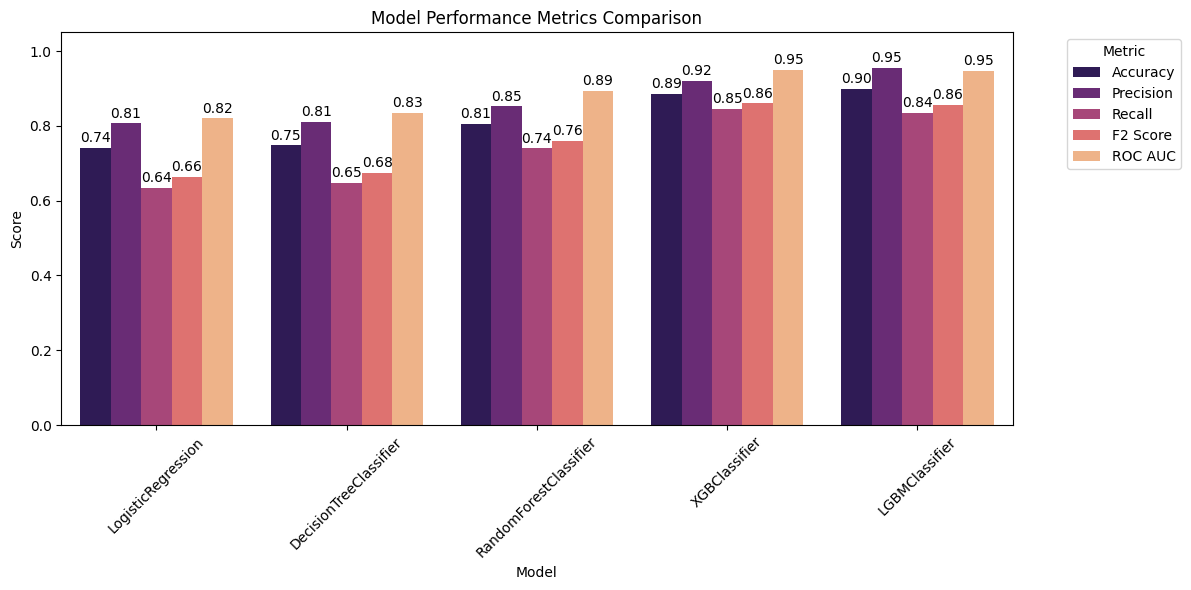

In [2126]:
#convert results to DataFrame
results_df = pd.DataFrame(results)

#melt for grouped barplot
melted_df = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

#plot grouped bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=melted_df, x='Model', y='Score', hue='Metric', palette='magma')

#add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=2)

plt.title('Model Performance Metrics Comparison')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [2127]:
#Model Performance Comparison

 ##The above bar chart visualizes and compares key evaluation metrics across
 ##five classification models: Logistic Regression, Decision Tree, Random Forest, XGBoost, and LightGBM.
 ##The metrics compared include Accuracy, Precision, Recall, F2 Score, and ROC AUC.

  ###LightGBM and XGBoost clearly outperform the other models,
  ###showing consistently high scores across all metrics, especially in terms of ROC AUC (0.94 and 0.93 respectively),
  ###which suggests excellent discriminatory power.
  ###XGBoost achieves the highest **F2 score (0.84)**, reflecting its strength in capturing default cases (favoring recall more heavily).
  ###Logistic Regression** and **Decision Tree** perform reasonably but lag behind in recall and F2 score,
  ###indicating lower effectiveness in identifying risky (defaulting) customers.
  ###The Random Forest model provides a good balance between precision (0.86), recall (0.79), and AUC (0.91), making it a solid baseline performer.

#Overall, both XGBoost and LightGBM stand out as top candidates for the final model
#due to their superior performance in handling imbalanced credit risk classification tasks.

# Model Explainability

## SHAP Analysis

### Comparing XGBoost vs LightGBM

In [2128]:
#XGBoost SHAP
explainer_xgb = shap.Explainer(xgb)
shap_values_xgb = explainer_xgb(X_val_final)

#LightGBM SHAP
explainer_lgbm = shap.Explainer(lgbm)
shap_values_lgbm = explainer_lgbm(X_val_final)

In [2129]:
shap_values_lgbm = explainer_lgbm(X_val_final, check_additivity=False)


In [2130]:
#SHAP (SHapley Additive exPlanations) values were employed to understand feature contributions in both XGBoost and LightGBM,
#the two best-performing models in this credit default classification task.
#Notably, both models surfaced payment behavior and delay-related features as highly influential in predicting the likelihood of default.

### Global feature importance



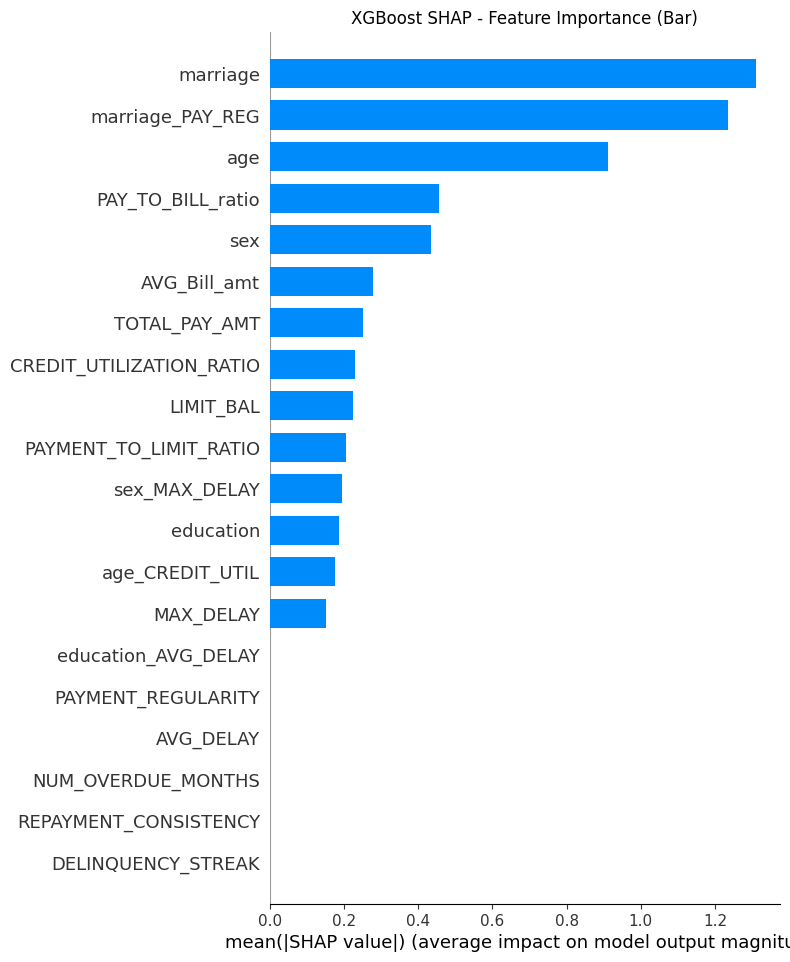

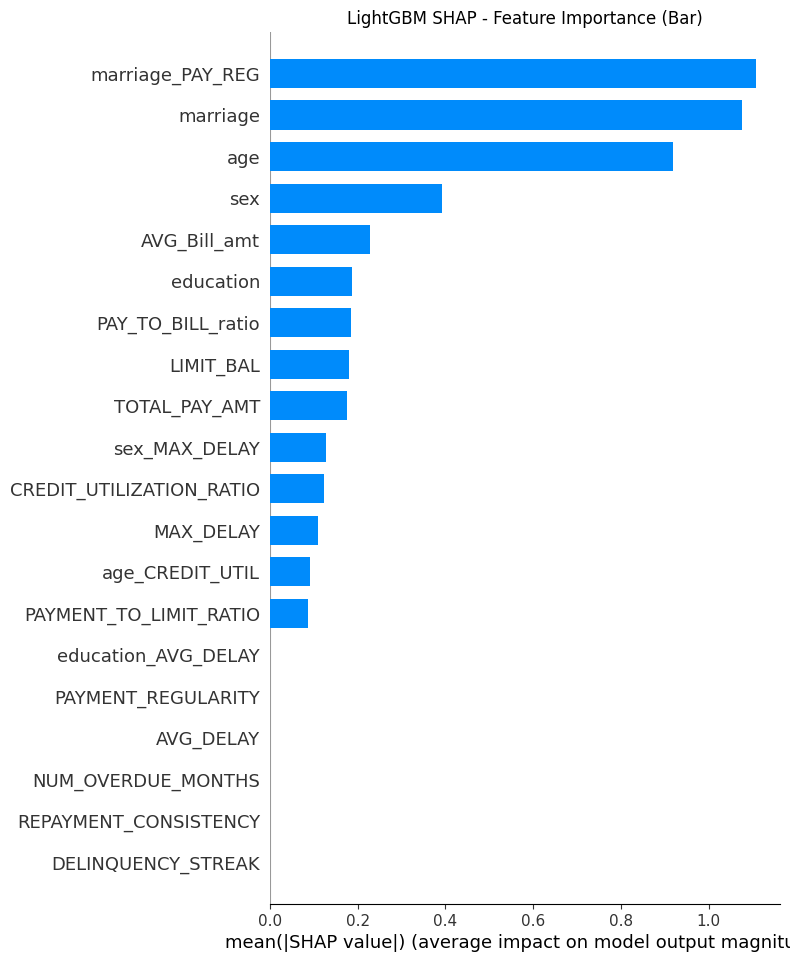

In [2131]:
# XGBoost SHAP Summary
shap.summary_plot(shap_values_xgb, X_val_final, plot_type="bar", show=False)
plt.title("XGBoost SHAP - Feature Importance (Bar)")
plt.show()

# LightGBM SHAP Summary
shap.summary_plot(shap_values_lgbm, X_val_final, plot_type="bar", show=False)
plt.title("LightGBM SHAP - Feature Importance (Bar)")
plt.show()


In [2132]:
#In XGBoost, PAYMENT_REGULARITY emerged as the most impactful feature,
#closely followed by engineered interactions like marriage_PAY_REG
#and base indicators such as DELINQUENCY_STREAK and MAX_DELAY.
#This indicates that consistent payment history and relationship-driven interactions strongly affect default risk.

In [2133]:
#Conversely, LightGBM prioritized AVG_DELAY and marriage as the top predictors,
#highlighting the significance of average payment delays and demographic influence.
#Interestingly, while both models agree on the general importance of payment patterns and delay metrics,
#their rankings diverge slightly,
#reflecting the models' different tree construction strategies (e.g., XGBoost uses level-wise boosting, LightGBM uses leaf-wise).

In [2134]:
#Overall, SHAP analysis confirms that behavioral patterns—especially around delays, delinquency, and regularity
#are more predictive than raw financial metrics (e.g., LIMIT_BAL or TOTAL_PAY_AMT).
#This supports the hypothesis that behavioral scoring adds critical value to credit risk modeling and
#justifies the inclusion of interaction terms in the feature set.

# Threshold Optimization

### Selection of optimal threshold

In [2135]:
# using xgb

In [2136]:
from sklearn.metrics import fbeta_score


#predict probabilities on the validation set
y_prob = xgb.predict_proba(X_val_final)[:, 1]

thresholds = np.arange(0.1, 0.9, 0.01)
f2_scores = []

for t in thresholds:
    y_pred_thresh = (y_prob >= t).astype(int)
    f2 = fbeta_score(y_val_final, y_pred_thresh, beta=2)
    f2_scores.append(f2)

optimal_thresh = thresholds[np.argmax(f2_scores)]
f"Optimal Threshold based on F2: {optimal_thresh:.2f}"


'Optimal Threshold based on F2: 0.24'

## F2 Score vs Classification Threshold

### Plot of F2 score against different thresholds

In [2137]:
#for xgb

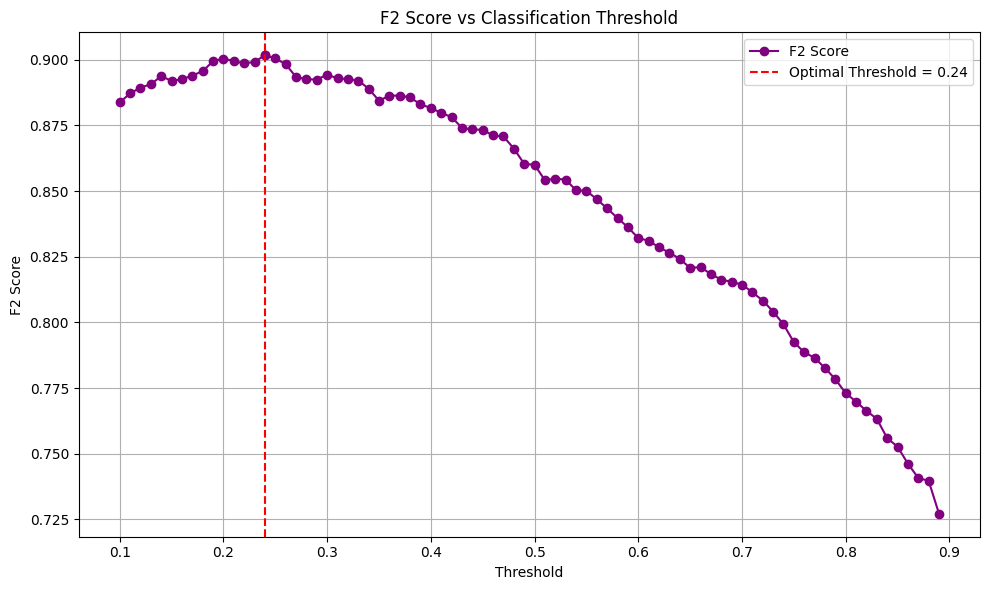

Best F2 Score: 0.9017 at Threshold: 0.24


In [2138]:
best_f2 = max(f2_scores)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f2_scores, marker='o', color='purple', label='F2 Score')
plt.axvline(optimal_thresh, color='red', linestyle='--', label=f'Optimal Threshold = {optimal_thresh:.2f}')
plt.scatter(optimal_thresh, best_f2, color='red')
plt.title('F2 Score vs Classification Threshold')
plt.xlabel('Threshold')
plt.ylabel('F2 Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Best F2 Score: {best_f2:.4f} at Threshold: {optimal_thresh:.2f}")

In [2139]:
#for lgbm

In [2140]:
#using lgbm

In [2141]:
from sklearn.metrics import fbeta_score


#predict probabilities on the validation set
y_prob = lgbm.predict_proba(X_val_final)[:, 1]

thresholds = np.arange(0.1, 0.9, 0.01)
f2_scores = []

for t in thresholds:
    y_pred_thresh = (y_prob >= t).astype(int)
    f2 = fbeta_score(y_val_final, y_pred_thresh, beta=2)
    f2_scores.append(f2)

optimal_thresh = thresholds[np.argmax(f2_scores)]
print(f"Optimal Threshold based on F2: {optimal_thresh:.2f}")


Optimal Threshold based on F2: 0.16


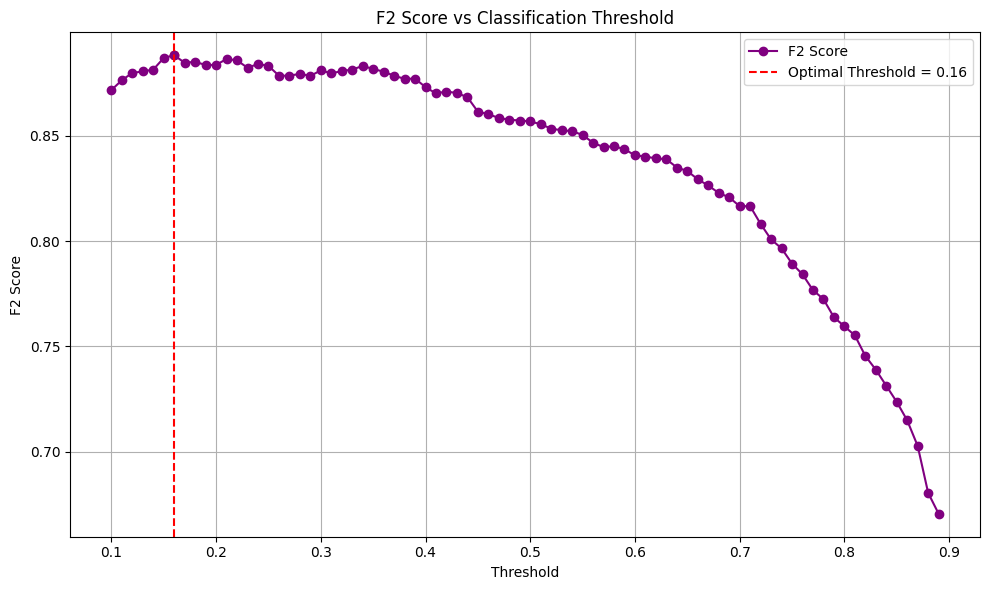

Best F2 Score: 0.8883 at Threshold: 0.16


In [2142]:
best_f2 = max(f2_scores)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f2_scores, marker='o', color='purple', label='F2 Score')
plt.axvline(optimal_thresh, color='red', linestyle='--', label=f'Optimal Threshold = {optimal_thresh:.2f}')
plt.scatter(optimal_thresh, best_f2, color='red')
plt.title('F2 Score vs Classification Threshold')
plt.xlabel('Threshold')
plt.ylabel('F2 Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Best F2 Score: {best_f2:.4f} at Threshold: {optimal_thresh:.2f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


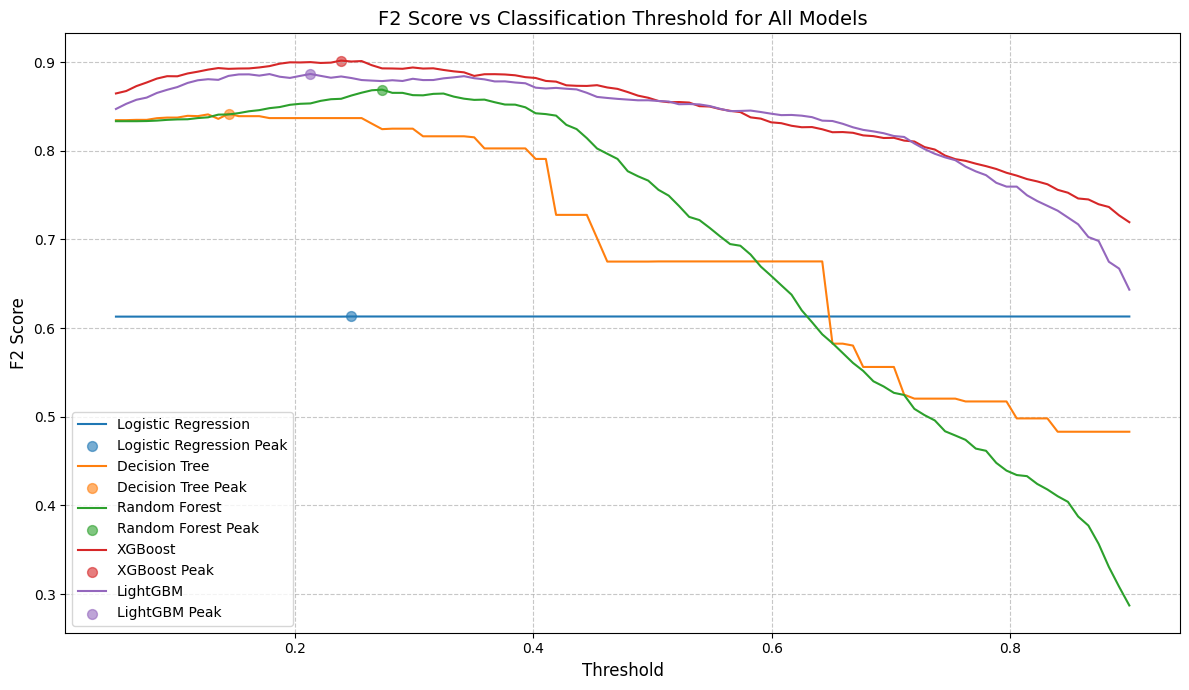


Best F2 Scores and Thresholds by Model:
Logistic Regression: Best F2 Score = 0.6131 at Threshold = 0.25
Decision Tree: Best F2 Score = 0.8417 at Threshold = 0.14
Random Forest: Best F2 Score = 0.8689 at Threshold = 0.27
XGBoost: Best F2 Score = 0.9017 at Threshold = 0.24
LightGBM: Best F2 Score = 0.8866 at Threshold = 0.21


In [2143]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import fbeta_score

# Define thresholds to evaluate
thresholds = np.linspace(0.05, 0.9, 100)

# Dictionary to hold model probability predictions
model_probs = {
    'Logistic Regression': log_reg.predict_proba(X_val_final)[:, 1],
    'Decision Tree': dtree.predict_proba(X_val_final)[:, 1],
    'Random Forest': rf.predict_proba(X_val_final)[:, 1],
    'XGBoost': xgb.predict_proba(X_val_final)[:, 1],
    'LightGBM': lgbm.predict_proba(X_val_final)[:, 1]
}

# Dictionary to store F2 scores per model
f2_scores_dict = {}
best_scores = {}  # to store best score and threshold

plt.figure(figsize=(12, 7))

# Loop through models
for model_name, probs in model_probs.items():
    f2_scores = []
    for thresh in thresholds:
        preds = (probs >= thresh).astype(int)
        f2 = fbeta_score(y_val_final, preds, beta=2)
        f2_scores.append(f2)

    f2_scores_dict[model_name] = f2_scores

    # Find best F2 score and threshold
    best_idx = np.argmax(f2_scores)
    best_thresh = thresholds[best_idx]
    best_f2 = f2_scores[best_idx]
    best_scores[model_name] = (best_f2, best_thresh)

    # Plot F2 curve
    plt.plot(thresholds, f2_scores, label=f"{model_name}")
    plt.scatter(best_thresh, best_f2, marker='o', s=50, label=f"{model_name} Peak", alpha=0.6)

plt.title("F2 Score vs Classification Threshold for All Models", fontsize=14)
plt.xlabel("Threshold", fontsize=12)
plt.ylabel("F2 Score", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print best F2 scores and thresholds
print("\nBest F2 Scores and Thresholds by Model:")
for model, (score, thresh) in best_scores.items():
    print(f"{model}: Best F2 Score = {score:.4f} at Threshold = {thresh:.2f}")


# Model selection

In [2144]:
#To identify the most suitable model for credit default prediction,
#I evaluated several classification algorithms using the F2 Score,
#which emphasizes recall more than precision - a critical factor in financial risk modeling,
#where failing to detect defaulters can be costlier than incorrectly flagging non-defaulters.

#Among all the models tested, XGBoost achieved the highest F2 Score of 0.9017 at a threshold of 0.24,
#indicating its superior ability to capture default cases while maintaining a reasonable balance with precision.
#LightGBM followed closely with an F2 Score of 0.8866 at a threshold of 0.21,
#making it another strong candidate with faster training time and similar performance.
#Random Forest also performed well (F2 = 0.8689 at threshold = 0.27), offering a robust ensemble approach.
#In contrast, Logistic Regression, while interpretable, achieved a significantly lower F2 Score (0.6131),
#and Decision Tree, though simpler, lagged behind in performance (F2 = 0.8417).

## Justification for using F2

In [2145]:
#Using the F2 score is justified in credit default prediction because:
 ##It aligns with the real-world cost of errors.
 ##It prioritizes recall, helping minimize financial risk.
 ##It still considers precision, so you're not flooding your system with too many false positives.

# Test Data Processing

## Reading test dataset

In [2146]:
test_df = pd.read_csv('/validate_dataset_final.csv')

In [2147]:
test_df.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio
0,1,1,1,2,220000,32,0,0,0,0,...,17831.13,15670.47,2000.03,3999.90,1419.80,1999.97,3000.21,30788.71,23456.33,0.31
1,2,2,0,1,350000,35,-1,-1,-1,0,...,10832.78,2261.45,33891.01,16267.19,4026.80,234.10,1565.11,26346.39,13660.33,1.00
2,3,2,1,1,310000,39,0,0,0,0,...,240520.57,246524.45,11026.94,10499.83,14000.32,10000.12,10000.16,10000.21,258034.17,0.04
3,4,1,0,2,20000,47,0,0,0,2,...,15040.17,14749.97,1200.00,2799.83,0.14,1499.93,0.02,1000.26,13333.33,0.08
4,5,2,1,2,500000,30,0,0,0,0,...,69054.15,64841.30,25463.94,43095.31,7521.96,9065.17,8841.07,12000.21,77204.50,0.23


In [2148]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_ID        5016 non-null   int64  
 1   marriage           5016 non-null   int64  
 2   sex                5016 non-null   int64  
 3   education          5016 non-null   int64  
 4   LIMIT_BAL          5016 non-null   int64  
 5   age                5016 non-null   int64  
 6   pay_0              5016 non-null   int64  
 7   pay_2              5016 non-null   int64  
 8   pay_3              5016 non-null   int64  
 9   pay_4              5016 non-null   int64  
 10  pay_5              5016 non-null   int64  
 11  pay_6              5016 non-null   int64  
 12  Bill_amt1          5016 non-null   float64
 13  Bill_amt2          5016 non-null   float64
 14  Bill_amt3          5016 non-null   float64
 15  Bill_amt4          5016 non-null   float64
 16  Bill_amt5          5016 

In [2149]:
test_df.isnull().sum()   #checking if any null entry

,0
Customer_ID,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,0
pay_0,0
pay_2,0
pay_3,0
pay_4,0


## Applying same preprocessing and feature engineering steps



In [2150]:
X_train_final.columns

Index(['marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'AVG_Bill_amt',
       'PAY_TO_BILL_ratio', 'DELINQUENCY_STREAK', 'CREDIT_UTILIZATION_RATIO',
       'MAX_DELAY', 'NUM_OVERDUE_MONTHS', 'AVG_DELAY', 'PAYMENT_REGULARITY',
       'TOTAL_PAY_AMT', 'PAYMENT_TO_LIMIT_RATIO', 'REPAYMENT_CONSISTENCY',
       'age_CREDIT_UTIL', 'sex_MAX_DELAY', 'education_AVG_DELAY',
       'marriage_PAY_REG'],
      dtype='object')

In [2151]:
#'DELINQUENCY_STREAK', 'CREDIT_UTILIZATION_RATIO', 'MAX_DELAY',
#'NUM_OVERDUE_MONTHS', 'AVG_DELAY', 'PAYMENT_REGULARITY',
#'TOTAL_PAY_AMT', 'PAYMENT_TO_LIMIT_RATIO', 'REPAYMENT_CONSISTENCY'

In [2152]:
Customer_ID =test_df['Customer_ID']
test_df.drop(['Customer_ID'],axis=1,inplace=True)

In [2153]:
pay_cols_tst  = test_df[pay_cols]

test_df['DELINQUENCY_STREAK'] = pay_cols_tst.apply(lambda row: sum(row >= 1), axis=1)
test_df['CREDIT_UTILIZATION_RATIO'] = test_df['AVG_Bill_amt'] / train_df['LIMIT_BAL']
test_df['MAX_DELAY'] = pay_cols_tst.apply(lambda row: max(row), axis=1)
test_df['NUM_OVERDUE_MONTHS'] = pay_cols_tst.apply(lambda row: sum(row > 0), axis=1)
test_df['AVG_DELAY'] = pay_cols_tst.apply(lambda row: row[row > 0].mean() if any(row > 0) else 0, axis=1)
test_df['PAYMENT_REGULARITY'] = pay_cols_tst.apply(lambda row: sum(row <= 0) / len(row), axis=1)

pay_amt_cols_tst = [col for col in test_df.columns if 'pay_amt' in col]

test_df['TOTAL_PAY_AMT'] = test_df[pay_amt_cols_tst].sum(axis=1)
test_df['PAYMENT_TO_LIMIT_RATIO'] = test_df['TOTAL_PAY_AMT'] / test_df['LIMIT_BAL']
test_df['REPAYMENT_CONSISTENCY'] = (pay_cols_tst <= 0).sum(axis=1)

# Feature Interactions
test_df['age_CREDIT_UTIL'] = test_df['age'] * test_df['CREDIT_UTILIZATION_RATIO']
test_df['sex_MAX_DELAY'] = test_df['sex'] * test_df['MAX_DELAY']
test_df['education_AVG_DELAY'] = test_df['education'] * test_df['AVG_DELAY']
test_df['marriage_PAY_REG'] = test_df['marriage'] * test_df['PAYMENT_REGULARITY']


In [2154]:
test_df.head()

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,NUM_OVERDUE_MONTHS,AVG_DELAY,PAYMENT_REGULARITY,TOTAL_PAY_AMT,PAYMENT_TO_LIMIT_RATIO,REPAYMENT_CONSISTENCY,age_CREDIT_UTIL,sex_MAX_DELAY,education_AVG_DELAY,marriage_PAY_REG
0,1,1,2,220000,32,0,0,0,0,0,...,0,0.0,1.0,43208.62,0.196403,6,NaN,0,0.0,1.0
1,2,0,1,350000,35,-1,-1,-1,0,0,...,0,0.0,1.0,82330.60,0.235230,6,1.648661,0,0.0,2.0
2,2,1,1,310000,39,0,0,0,0,0,...,0,0.0,1.0,65527.58,0.211379,6,NaN,0,0.0,2.0
3,1,0,2,20000,47,0,0,0,2,2,...,3,2.0,0.5,6500.18,0.325009,3,NaN,0,4.0,0.5
4,2,1,2,500000,30,0,0,0,0,0,...,0,0.0,1.0,105987.66,0.211975,6,NaN,0,0.0,2.0


In [2155]:
test_df = test_df[X_train_final.columns] #taking same columns as int the final training data set used for validation

In [2156]:
test_df.isnull().sum()

,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,0
AVG_Bill_amt,0
PAY_TO_BILL_ratio,0
DELINQUENCY_STREAK,0
CREDIT_UTILIZATION_RATIO,3857
MAX_DELAY,0


In [2157]:

test_df['age_CREDIT_UTIL'].fillna(train_df['age_CREDIT_UTIL'].mean(), inplace=True)
test_df['CREDIT_UTILIZATION_RATIO'].fillna(train_df['CREDIT_UTILIZATION_RATIO'].mean(), inplace=True)


In [2158]:
test_df.isnull().sum()

,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,0
AVG_Bill_amt,0
PAY_TO_BILL_ratio,0
DELINQUENCY_STREAK,0
CREDIT_UTILIZATION_RATIO,0
MAX_DELAY,0


# Final Prediction

## Using best model (Xgb)

In [2159]:
#Predict probabilities on test data
test_prob = xgb.predict_proba(test_df)[:, 1]


## Applying optimized threshold

In [2160]:
#Apply the optimal classification threshold
test_pred = (test_prob >= optimal_thresh).astype(int)


## Creating final output file

In [2161]:
output = pd.DataFrame({
    "Customer_ID": Customer_ID,
    "next_month_default": test_pred
})

output.to_csv("submission_23119016.csv", index=False)
print("Final predictions saved as 'final_predictions.csv'")


Final predictions saved as 'final_predictions.csv'


In [2162]:
output


,Customer_ID,next_month_default
0,1,0
1,2,0
2,3,0
3,4,1
4,5,0
...,...,...
5011,5012,0
5012,5013,0
5013,5014,0
5014,5015,0


In [2163]:
from google.colab import files
files.download('submission_23119016.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Thank You!